## Problem Statement: Solar Panel Failure Prediction Model

### Objective(s):
Minimize Human labour/Cost of maintenance


### Constraints: 
 Maximize Output power

### Success Criteria

-  Business Success Criteria: Reduce cost of fault detection by atleast 30%
-  ML Success Criteria :Achieve accuracy greater than 90%
-  Economic Success Criteria:Increase solar scalability and make a profit of atleast 20%

### Data Collection

GPVS-Faults: Experimental Data for fault scenarios in grid-connected PV
systems under MPPT and IPPT modes. {Mendeley Data}
#### Features:
- Time: Time of real measurement in seconds. The average sampling is 𝑇! = 9.9989 𝜇𝑠.
- Ipv: PV array current measurement.
- Vpv: PV array voltage measurement.
- Vdc: DC voltage measurement.
- ia: Phase_A current measurement.
- ib: Phase_B current measurement.
- ic: Phase_C current measurement.
- va: Phase_A voltage measurement.
- vb: Phase_B voltage measurement.
- vc: Phase_C voltage measurement.
- Iabc: Positive-sequence estimated current magnitude.
- If: Positive-sequence estimated current frequency.
- Vabc: Positive-sequence estimated voltage magnitude.
- Vf: Positive-sequence estimated vurrent frequency.

### DATA PREPARATION

In [1]:
### Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy.stats import shapiro, probplot
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, PowerTransformer

%matplotlib inline

In [5]:
solar_data_final=pd.read_csv(r"C:\Users\user\Downloads\data.csv")

In [6]:
solar_data_final

Ipv         Vpv         Vdc        ia        ib        ic  \
0     1.783295   75.219727  144.433594 -0.202271  0.449829 -0.267705   
1     1.529755  101.049805  143.847656 -0.000855 -0.422974  0.403682   
2     1.316895  101.910400  143.554688  0.301269 -0.456543  0.148555   
3     1.549622  101.641846  142.968750  0.495971 -0.073853 -0.442266   
4     1.522186  100.872803  143.847656  0.059569  0.375977 -0.435552   
...        ...         ...         ...       ...       ...       ...   
9995  1.424744  101.104736  143.554688  0.442260 -0.409546 -0.079717   
9996  2.077515   75.048828  143.847656  0.039428 -0.375977  0.356685   
9997  1.510834  101.757812  138.281250 -0.544679 -0.302124 -0.341558   
9998  1.385010  101.873779  144.140625 -0.490968  0.275269  0.202266   
9999  0.035950    1.324463  118.359375 -0.067994 -0.100708  0.155269   

              va          vb          vc      Iabc         If        Vabc  \
0      72.097626 -153.103485   87.326406  0.461523  50.092370  155.073888   
1      -9.583282  139.819489 -129.794210  0.469913  50.201232  155.849812   
2     -82.440338  157.816772  -69.763082  0.460822  50.092749  155.418441   
3    -144.797974   31.425934  119.001465  0.523424  50.235815  155.375504   
4     -16.140900 -124.594727  142.507629  0.515559  49.911126  155.124685   
...          ...         ...         ...       ...        ...         ...   
9995 -138.204193  133.973083   14.726512  0.491173  49.998483  155.760632   
9996  -17.466888  141.519165 -125.876516  0.425375  50.010891  155.260143   
9997  100.726929   51.014404 -151.986440  0.307226  49.819454  154.983641   
9998  155.152740  -77.739105  -76.023356  0.435145  50.362438  154.787528   
9999  -35.608826 -109.550781  150.383199  0.132339  49.814839  154.950493   

             Vf label  
0     49.997718     F  
1     50.010266     F  
2     50.009106    NF  
3     50.003277    NF  
4     50.005261    NF  
...         ...   ...  
9995  50.007418    NF  
9996  50.009380     F  
9997  50.040253     F  
9998  49.998663    NF  
9999  49.999637     F  

[10000 rows x 14 columns]

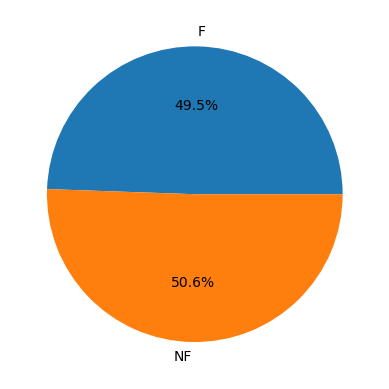

In [7]:
## checking if the dataset is balanced or not
# Select the output feature column
output_feature = solar_data_final["label"]

# Get the unique values and their counts
unique_values, counts = np.unique(output_feature, return_counts=True)

# Create a dictionary of unique values and their counts
count_dict = dict(zip(unique_values, counts))

# Plot the pie chart
plt.pie(count_dict.values(), labels=count_dict.keys(), autopct='%1.1f%%')
plt.show()

### EXPLORATORY DATA ANALYSIS

In [8]:
# basic statistics about the dataset
solar_data_final.describe().T

count        mean         std         min         25%         50%  \
Ipv   10000.0    1.438992    0.334681   -0.086090    1.404877    1.470154   
Vpv   10000.0   97.454661   15.388621    0.994873  101.109314  101.403809   
Vdc   10000.0  142.928379    9.684769  111.914062  142.675781  143.554688   
ia    10000.0   -0.016174    0.343600   -0.813233   -0.349977   -0.014283   
ib    10000.0    0.031675    0.335225   -0.651245   -0.275269    0.053711   
ic    10000.0   -0.046170    0.328668   -0.885381   -0.341558   -0.059575   
va    10000.0    0.623547  110.178236 -157.322540 -108.616562   -1.820221   
vb    10000.0   -0.677062  109.714799 -157.141724 -109.177094   -3.779068   
vc    10000.0    2.482304  109.512188 -156.534983 -106.124306    2.274272   
Iabc  10000.0    0.446183    0.097319    0.000006    0.445089    0.467787   
If    10000.0   49.779964    3.263696   -0.010568   49.921767   50.013929   
Vabc  10000.0  154.995425    5.964558    1.000000  154.987992  155.255713   
Vf    10000.0   50.000059    0.021625   49.452575   49.996400   50.000082   

             75%         max  
Ipv     1.539215    2.173065  
Vpv   101.757812  109.490967  
Vdc   144.140625  237.011719  
ia      0.307982    0.885375  
ib      0.335693    0.792236  
ic      0.255977    0.584956  
va    111.265526  159.552612  
vb    108.960114  158.949890  
vc    112.174632  159.231160  
Iabc    0.489224    1.000000  
If     50.116801   51.857902  
Vabc  155.490345  156.209771  
Vf     50.003742   50.463181

In [9]:
solar_data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ipv     10000 non-null  float64
 1   Vpv     10000 non-null  float64
 2   Vdc     10000 non-null  float64
 3   ia      10000 non-null  float64
 4   ib      10000 non-null  float64
 5   ic      10000 non-null  float64
 6   va      10000 non-null  float64
 7   vb      10000 non-null  float64
 8   vc      10000 non-null  float64
 9   Iabc    10000 non-null  float64
 10  If      10000 non-null  float64
 11  Vabc    10000 non-null  float64
 12  Vf      10000 non-null  float64
 13  label   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


### OBSERVATION 2: All are numerical features except label and no missing value

In [10]:
# LIST OF NUMERICAL FEATURES
Numerical_features=[feature for feature in solar_data_final.columns if solar_data_final[feature].dtype!='object']

In [11]:
Numerical_features

['Ipv',
 'Vpv',
 'Vdc',
 'ia',
 'ib',
 'ic',
 'va',
 'vb',
 'vc',
 'Iabc',
 'If',
 'Vabc',
 'Vf']

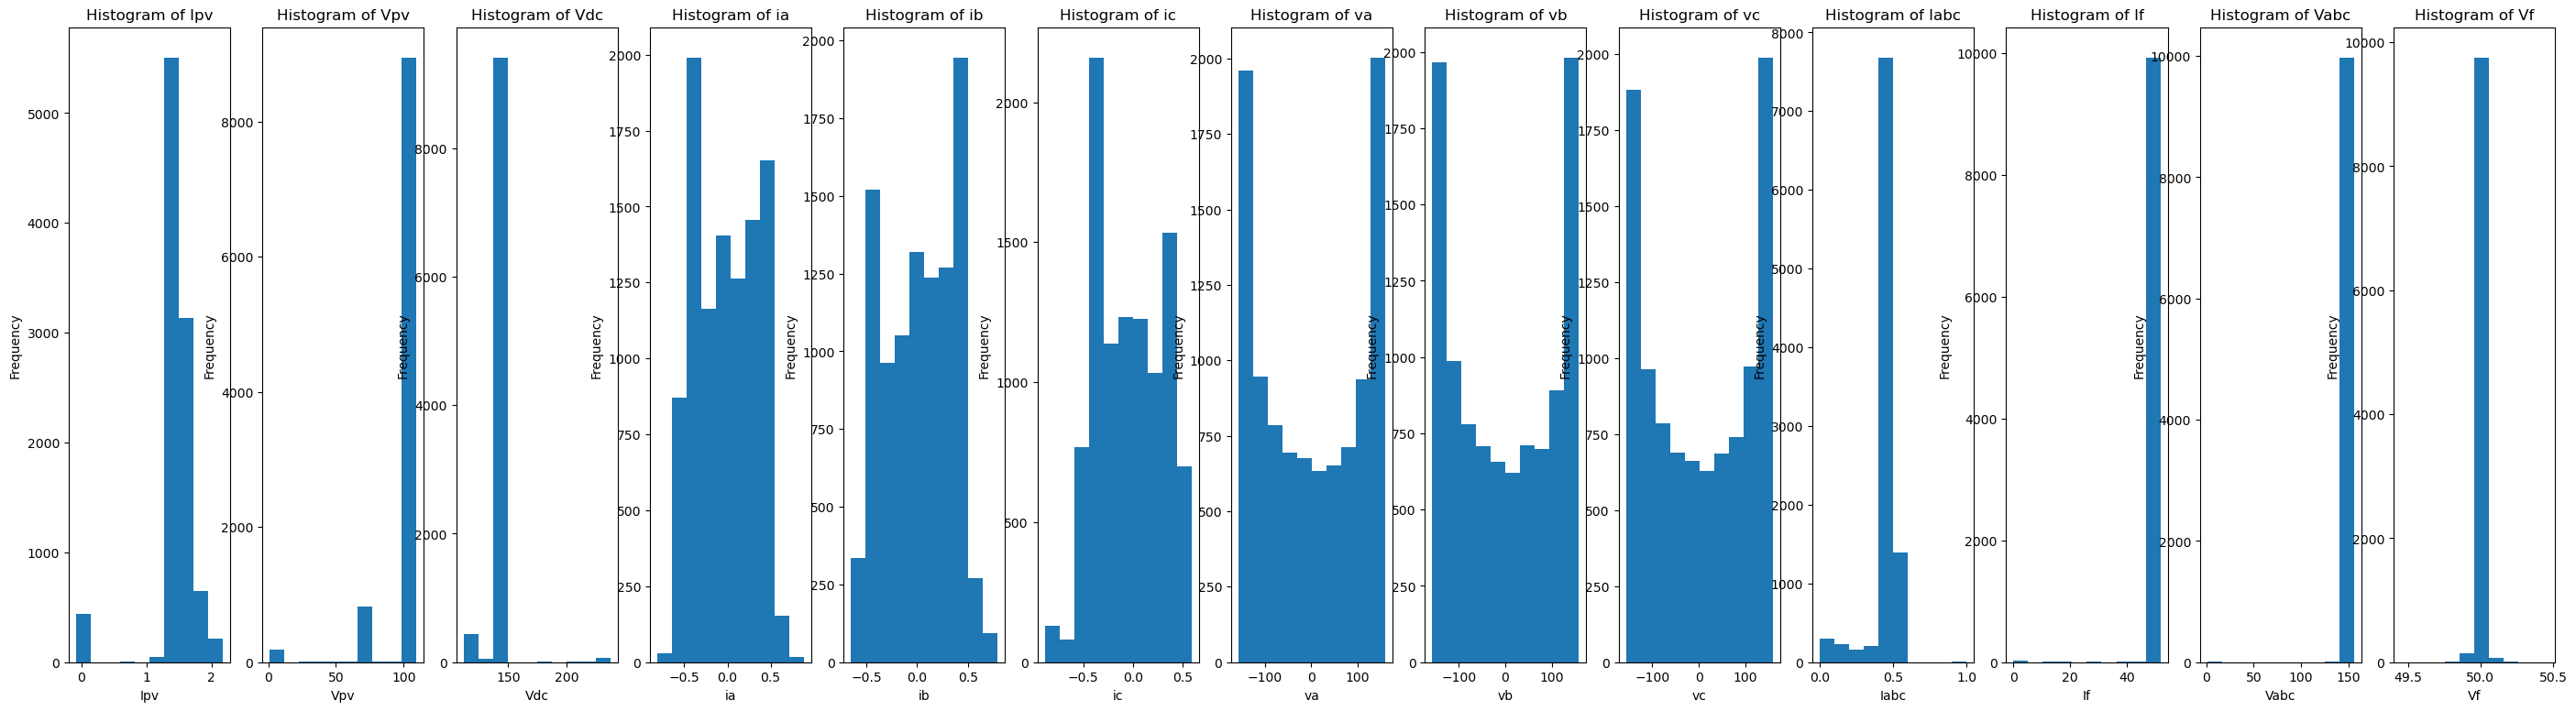

In [12]:
## Visualise the numerical features
fig, axes = plt.subplots(nrows=1, ncols=len(Numerical_features), figsize=(35,9))

for i, col in enumerate(Numerical_features):
    axes[i].hist(solar_data_final[col], bins = 10)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title('Histogram of {}'.format(col))

plt.show()

### OBSERVATION 3: Most of the features are skewed and some of them have outliers. 

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


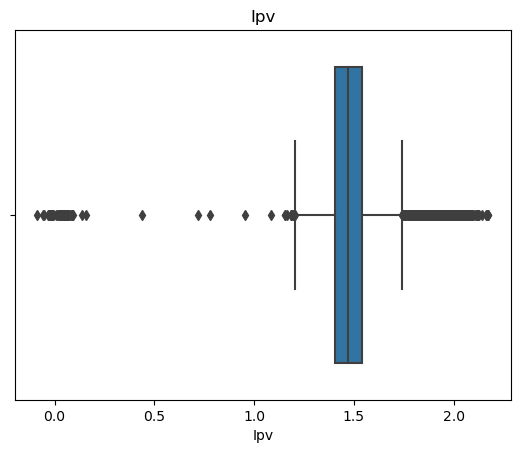

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


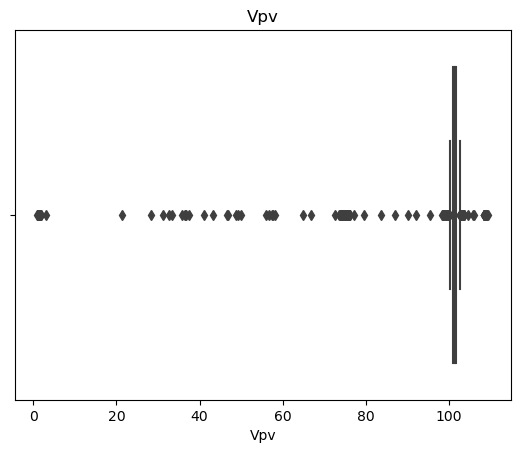

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


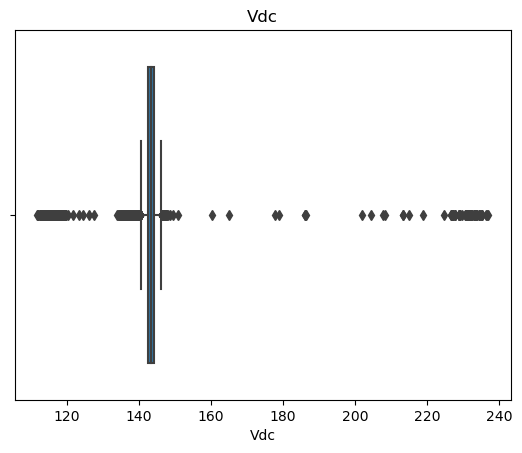

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


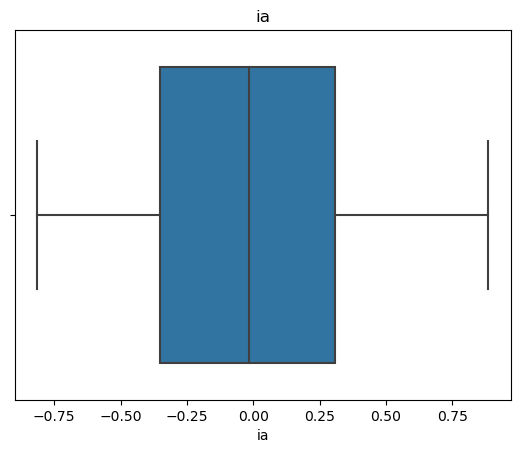

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


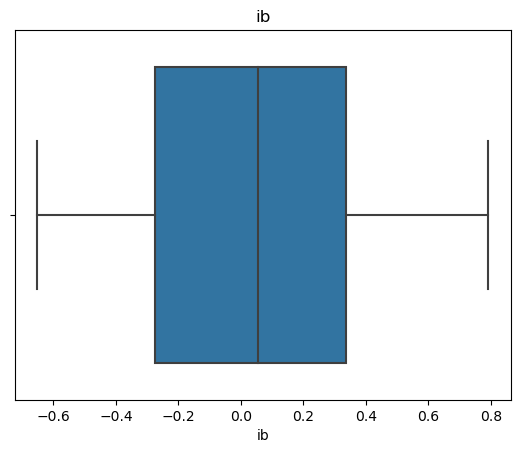

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


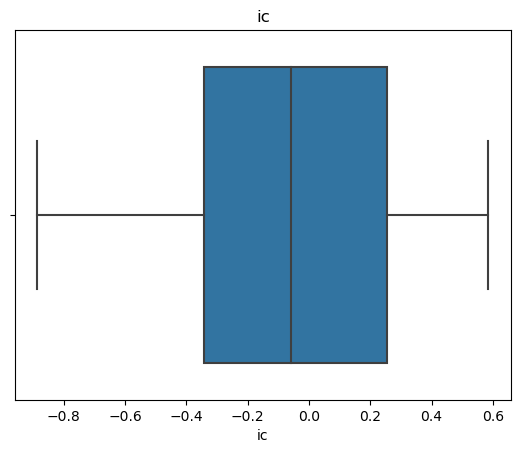

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


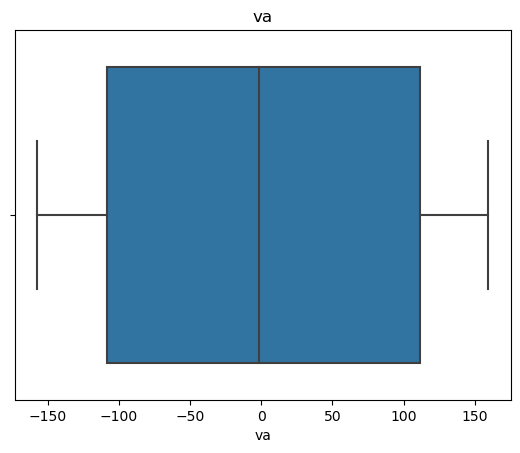

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


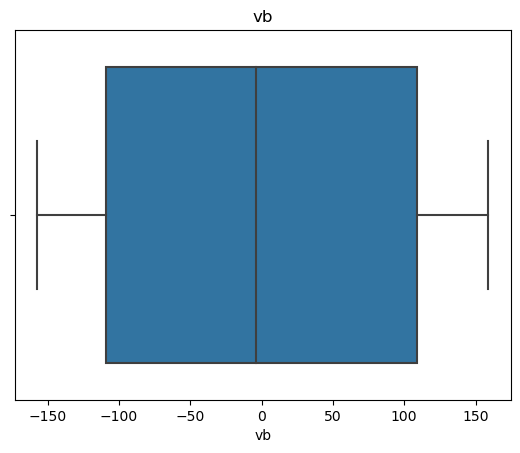

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


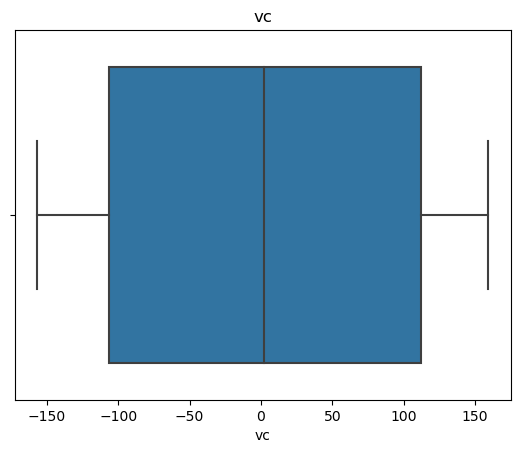

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


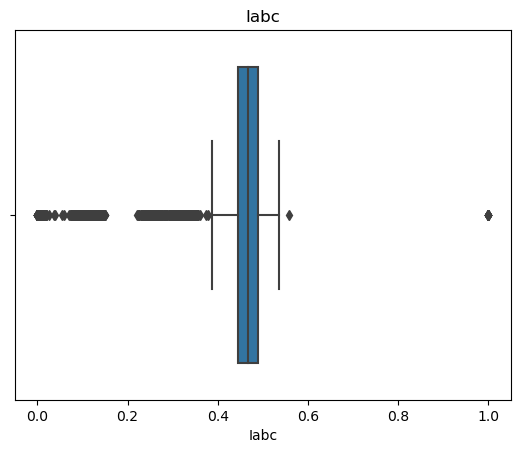

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


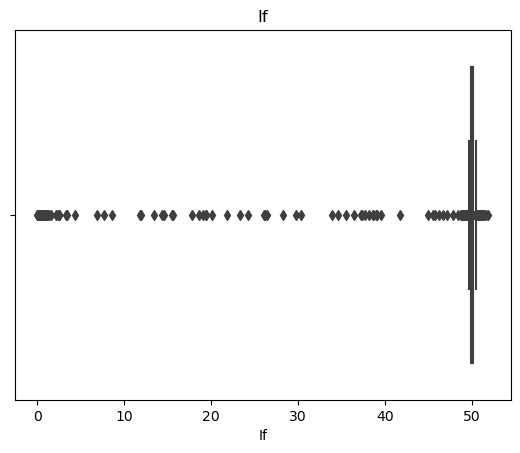

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


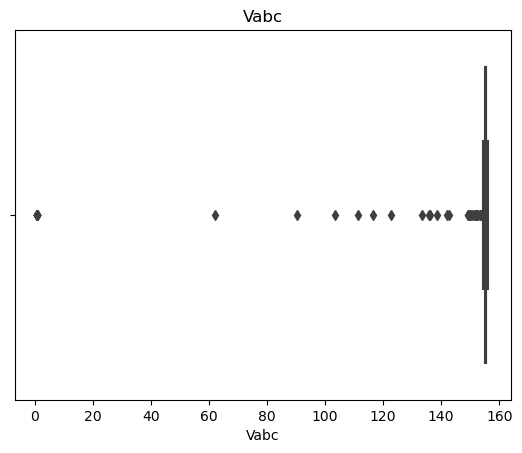

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


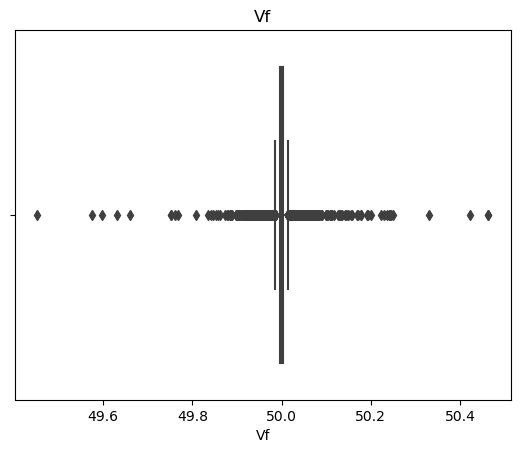

In [13]:
## VERIFYING OUTLIERS
for col in Numerical_features:
    sns.boxplot(solar_data_final[col])
    plt.title(col)
    plt.show()

### OBSERVATION 4: Outliers are present in a number of features which is confirmed by the boxplots

In [14]:
feature_with_outliers=['Ipv', 'Vpv', 'Vdc', 'ia', 'ib', 'ic', 'Iabc', 'If', 'Vabc', 'Vf']
feature_with_outliers

['Ipv', 'Vpv', 'Vdc', 'ia', 'ib', 'ic', 'Iabc', 'If', 'Vabc', 'Vf']

### Bivariate analysis

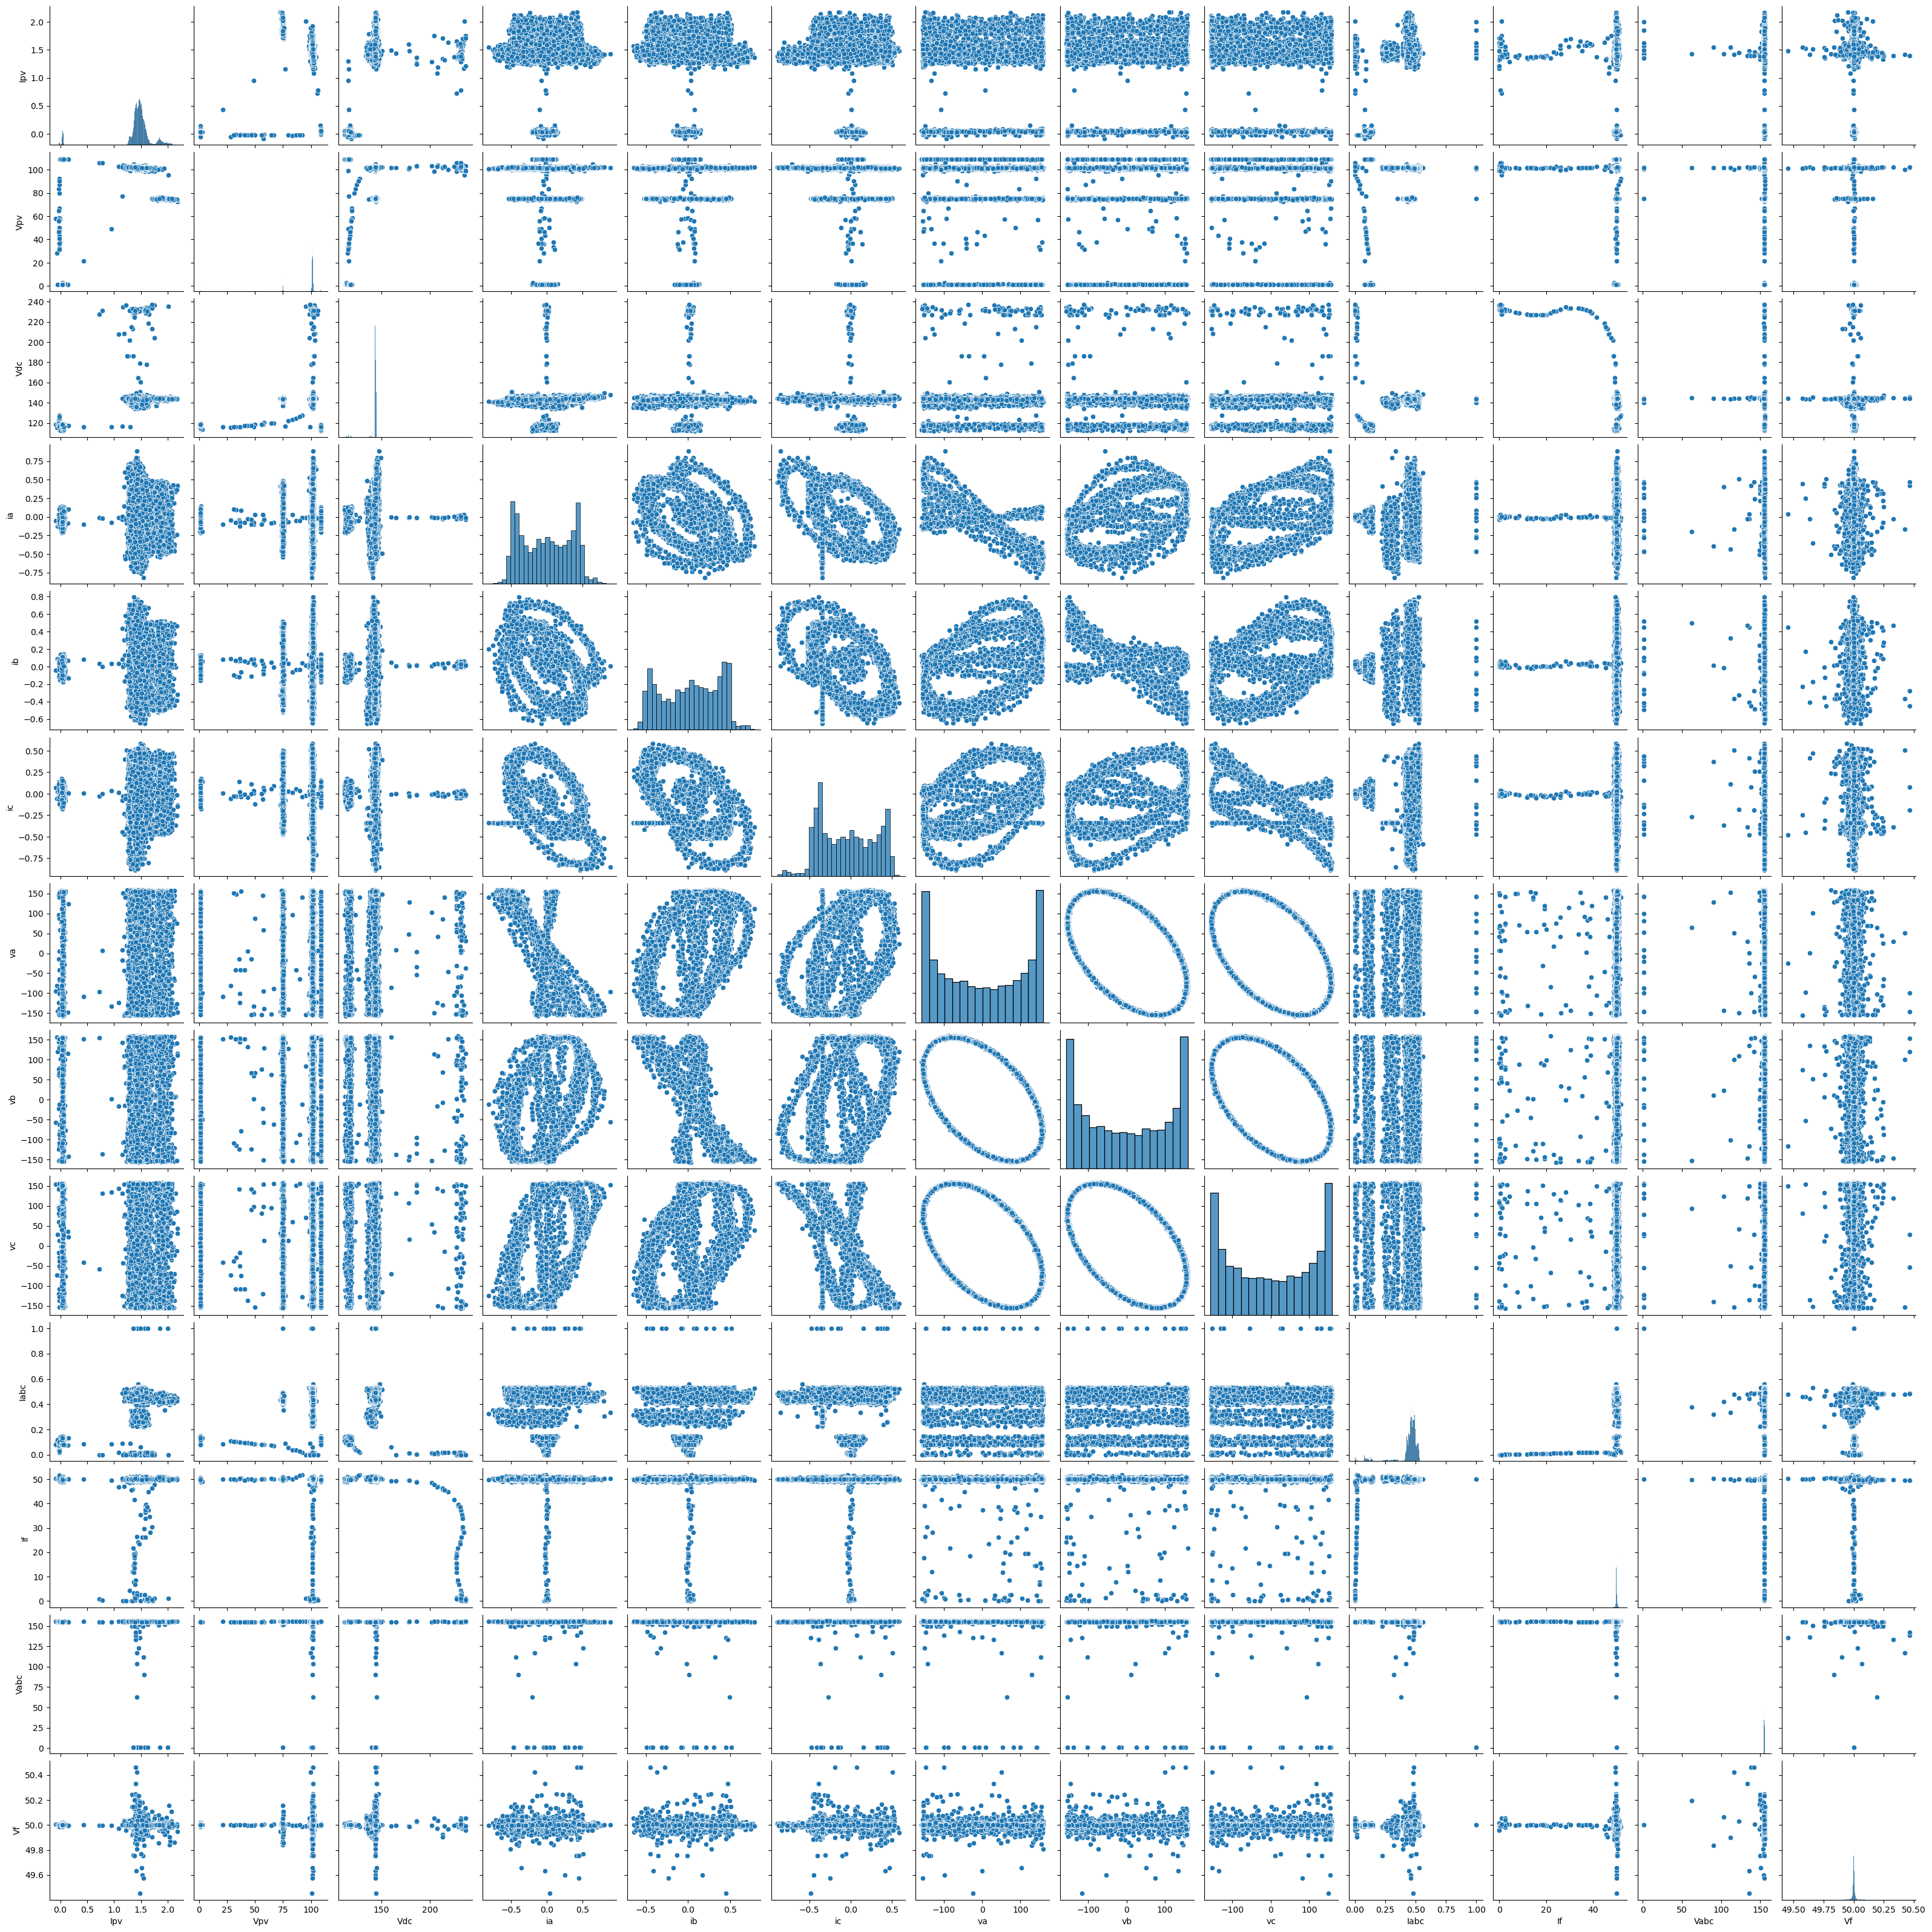

In [15]:
#Pairplot
sns.pairplot(solar_data_final)

In [16]:
# creating a correlation matrix
corr = solar_data_final.corr()
corr

Ipv       Vpv       Vdc        ia        ib        ic        va  \
Ipv   1.000000  0.298754  0.525500 -0.000484  0.003068  0.003408  0.015074   
Vpv   0.298754  1.000000  0.293668  0.008360  0.012211 -0.044994  0.005113   
Vdc   0.525500  0.293668  1.000000  0.020958  0.009531  0.001243  0.009281   
ia   -0.000484  0.008360  0.020958  1.000000 -0.489883 -0.480406 -0.942764   
ib    0.003068  0.012211  0.009531 -0.489883  1.000000 -0.452425  0.490115   
ic    0.003408 -0.044994  0.001243 -0.480406 -0.452425  1.000000  0.457796   
va    0.015074  0.005113  0.009281 -0.942764  0.490115  0.457796  1.000000   
vb    0.001952 -0.004682 -0.008563  0.474669 -0.924232  0.416118 -0.512461   
vc   -0.019842 -0.002616 -0.002164  0.473126  0.440409 -0.885312 -0.492678   
Iabc  0.675249  0.402630  0.132868  0.037117  0.010080  0.036708  0.000154   
If   -0.003232 -0.018499 -0.725625 -0.003821  0.002594 -0.011656 -0.003375   
Vabc -0.012289 -0.000372 -0.002378 -0.003958  0.007153 -0.007814  0.004003   
Vf   -0.012773 -0.001701 -0.001383  0.001923  0.015925 -0.014156  0.000101   

            vb        vc      Iabc        If      Vabc        Vf  
Ipv   0.001952 -0.019842  0.675249 -0.003232 -0.012289 -0.012773  
Vpv  -0.004682 -0.002616  0.402630 -0.018499 -0.000372 -0.001701  
Vdc  -0.008563 -0.002164  0.132868 -0.725625 -0.002378 -0.001383  
ia    0.474669  0.473126  0.037117 -0.003821 -0.003958  0.001923  
ib   -0.924232  0.440409  0.010080  0.002594  0.007153  0.015925  
ic    0.416118 -0.885312  0.036708 -0.011656 -0.007814 -0.014156  
va   -0.512461 -0.492678  0.000154 -0.003375  0.004003  0.000101  
vb    1.000000 -0.494465  0.008248  0.009364 -0.008037 -0.014613  
vc   -0.494465  1.000000 -0.007504 -0.005202  0.004820  0.014836  
Iabc  0.008248 -0.007504  1.000000  0.354601 -0.197310  0.012289  
If    0.009364 -0.005202  0.354601  1.000000 -0.002118 -0.004934  
Vabc -0.008037  0.004820 -0.197310 -0.002118  1.000000 -0.023193  
Vf   -0.014613  0.014836  0.012289 -0.004934 -0.023193  1.000000

<AxesSubplot:>

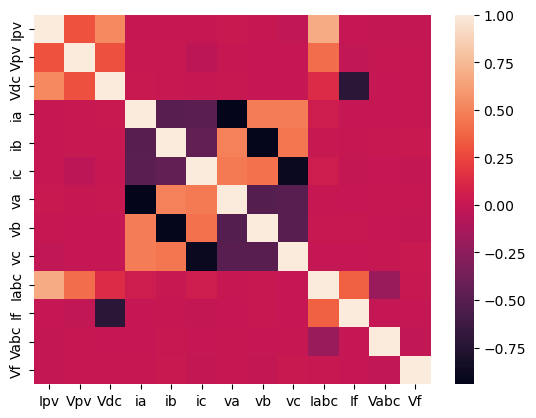

In [17]:
# creating a heatmap of the correlation matrix
sns.heatmap(corr)

### OBSERVATION 5: We can conclude that only a few features have positive correlation. Clusters are seen in few features. No multicollinearity issue

### AUTOMATING THE EDA PROCESS

Using sweetviz to automate EDA is pretty simple and straight forward. 3 simple steps will provide a detailed report in html page.

step 1. Install sweetviz package using pip.
- !pip install sweetviz

step2. import sweetviz package and call analyze function on the dataframe.

step3. Display the report on a html page created in the working directory with show_html function.


In [12]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


                                             |                                             | [  0%]   00:00 ->…


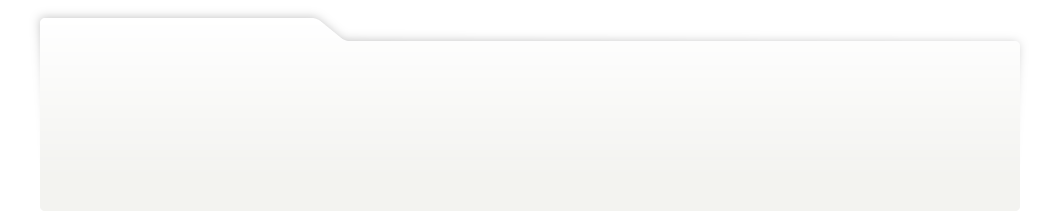
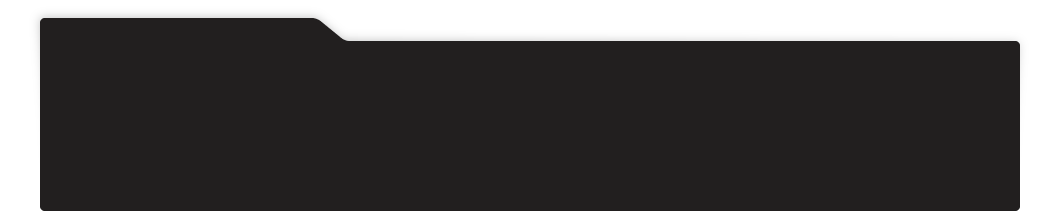
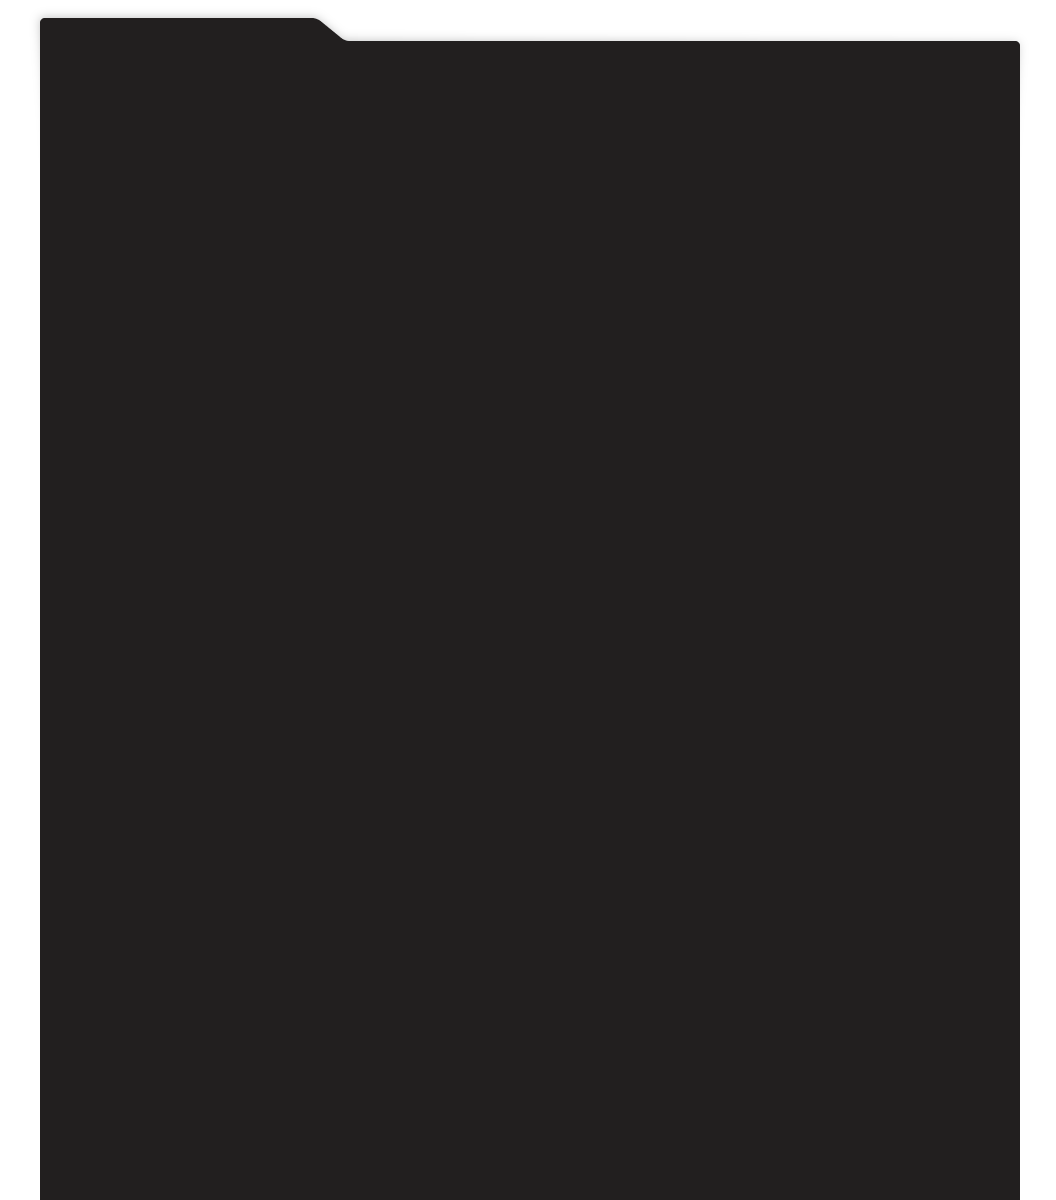
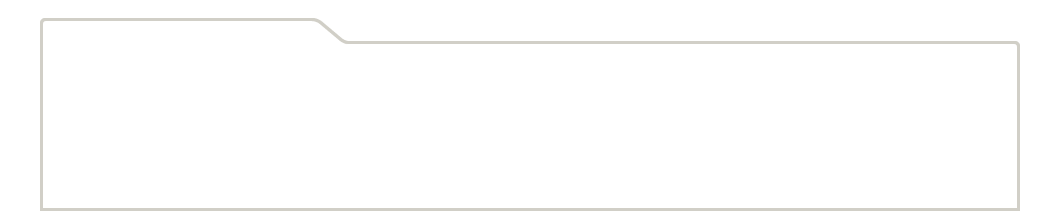
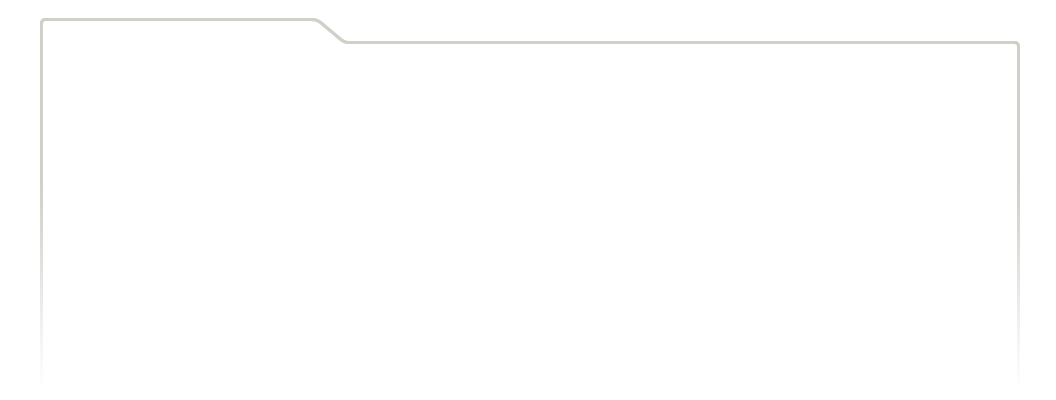
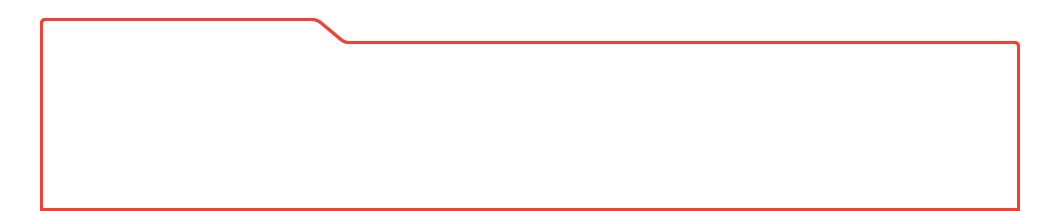
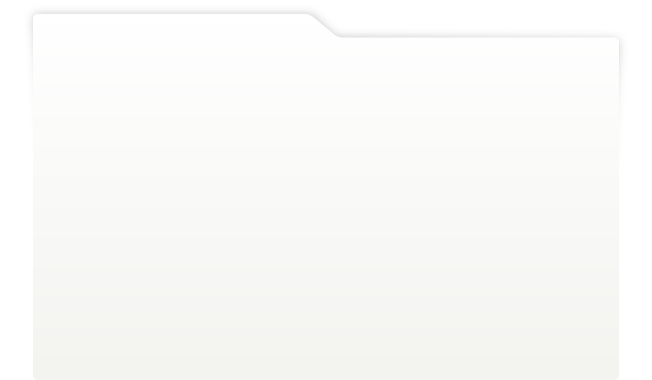
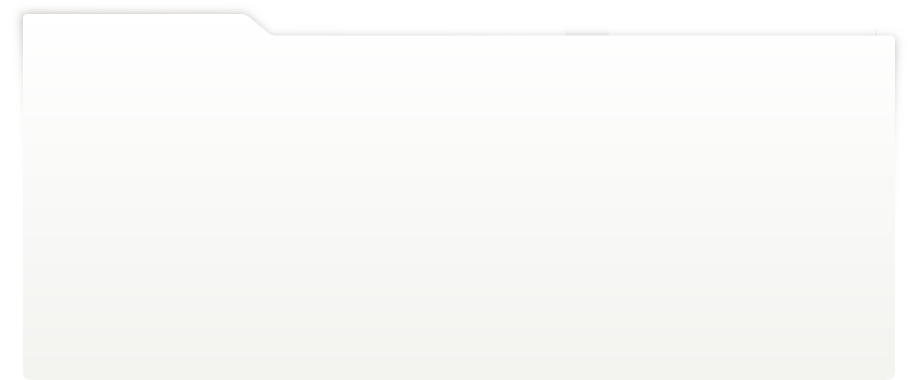
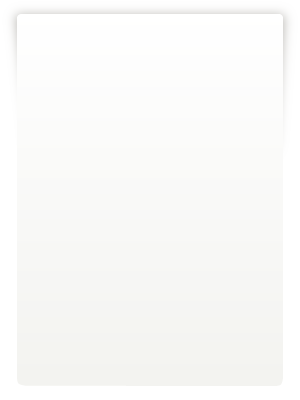
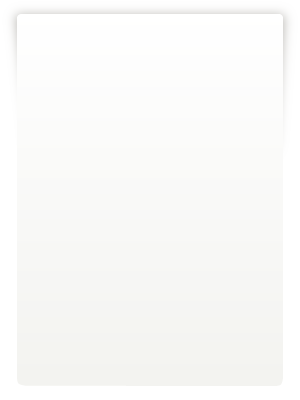
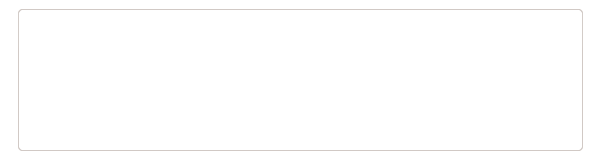
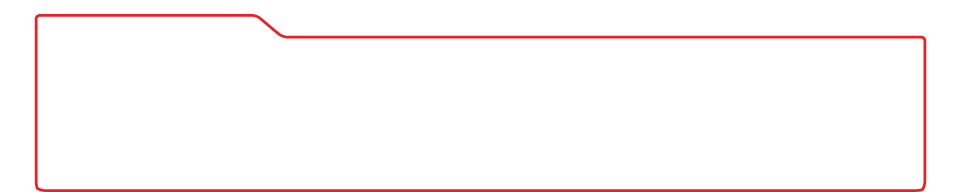
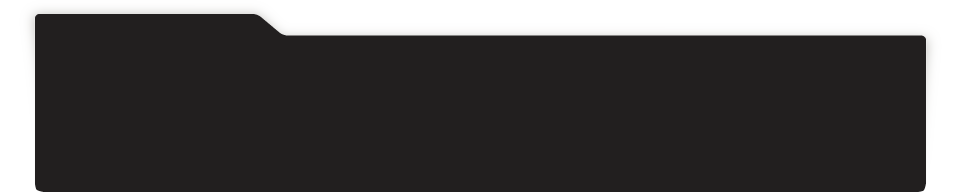
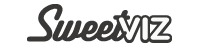
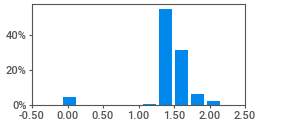
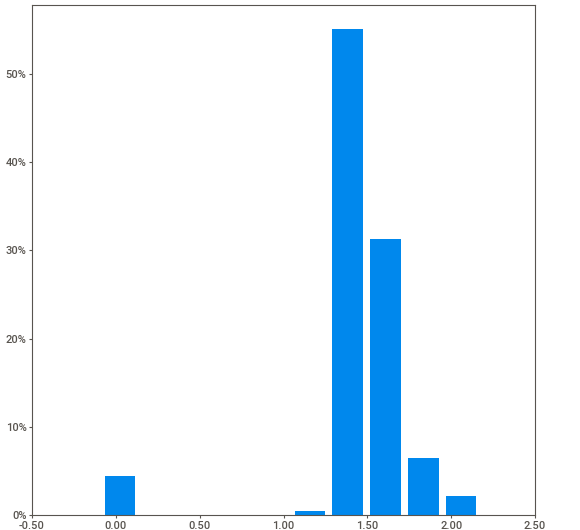
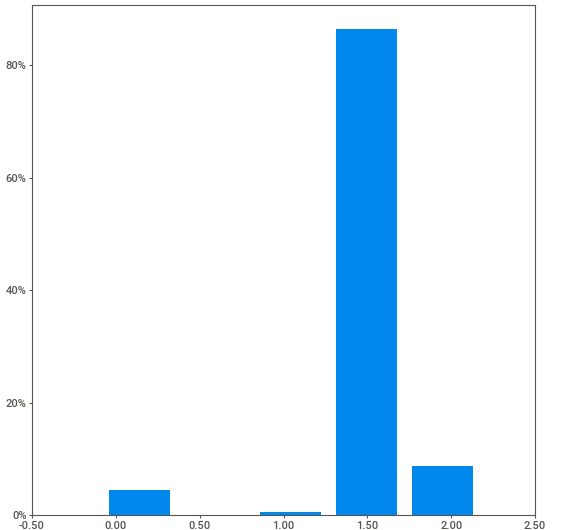
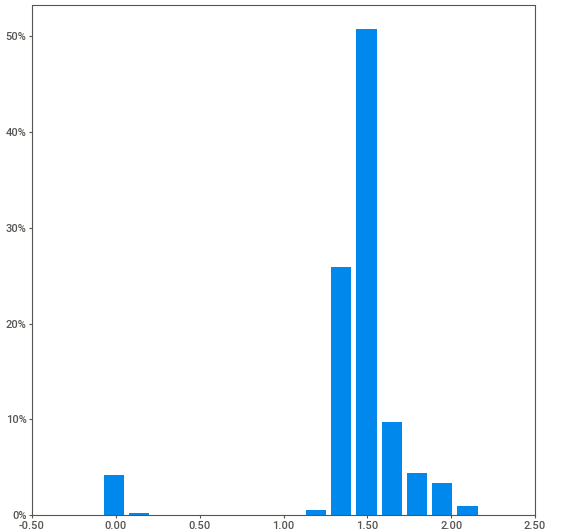
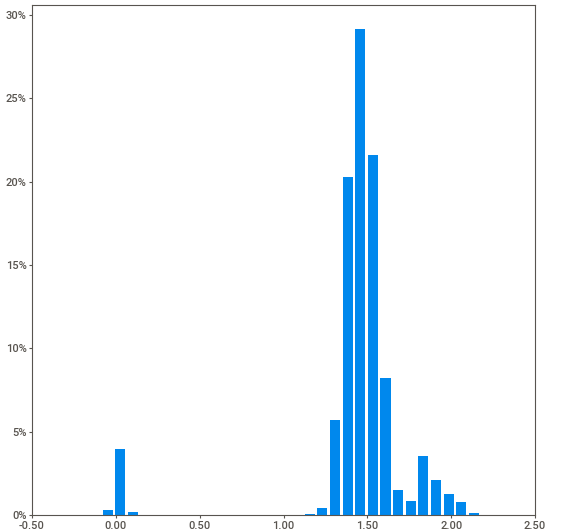
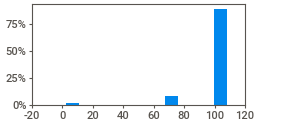
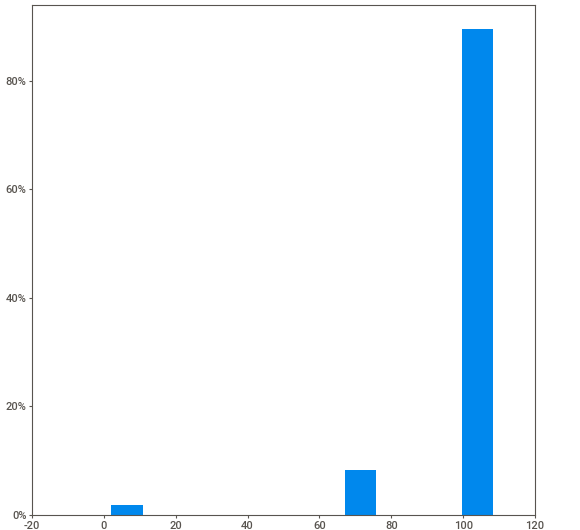
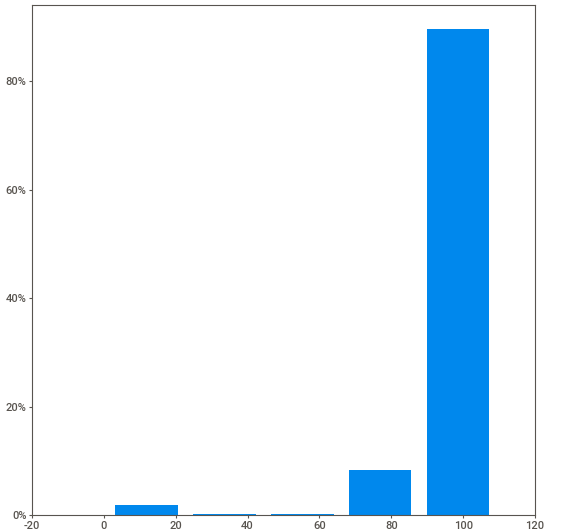
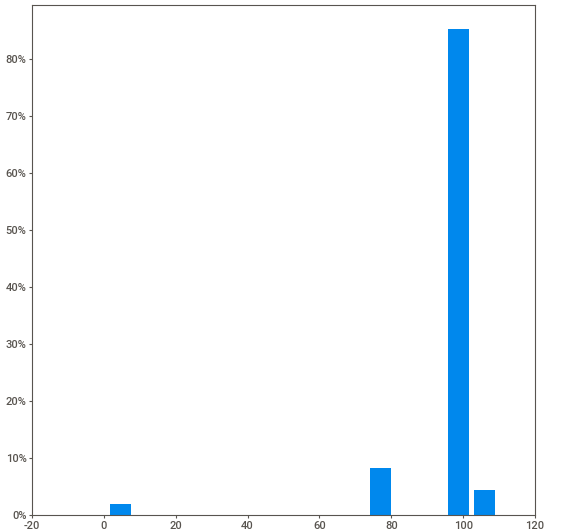
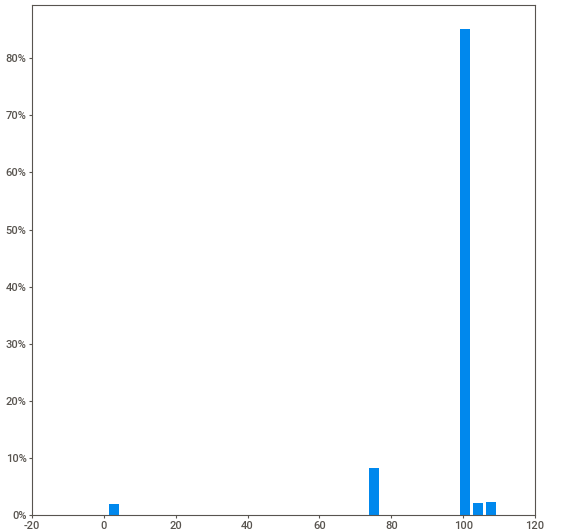
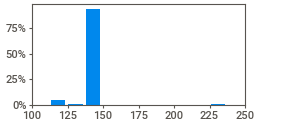
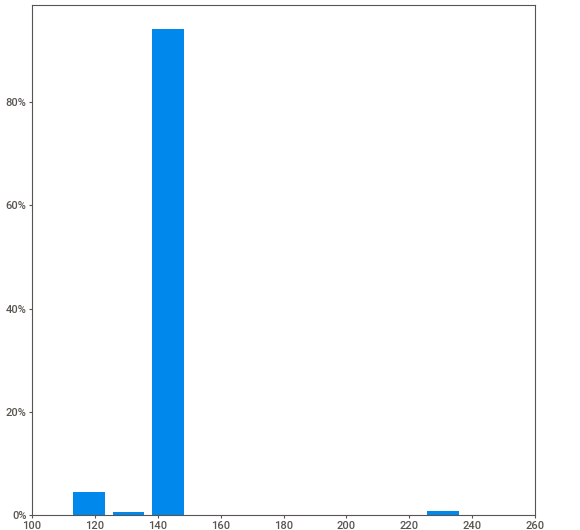
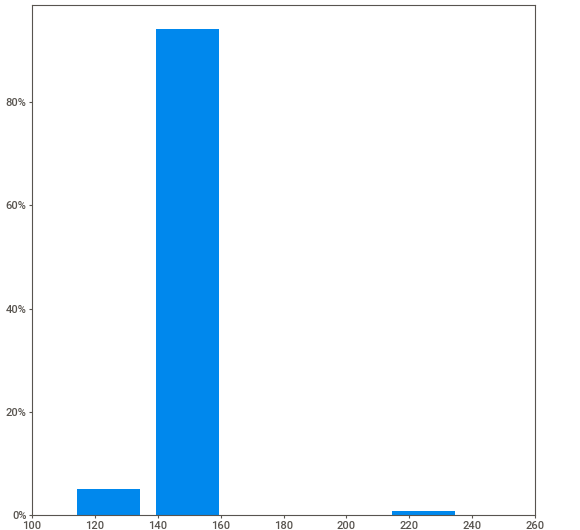
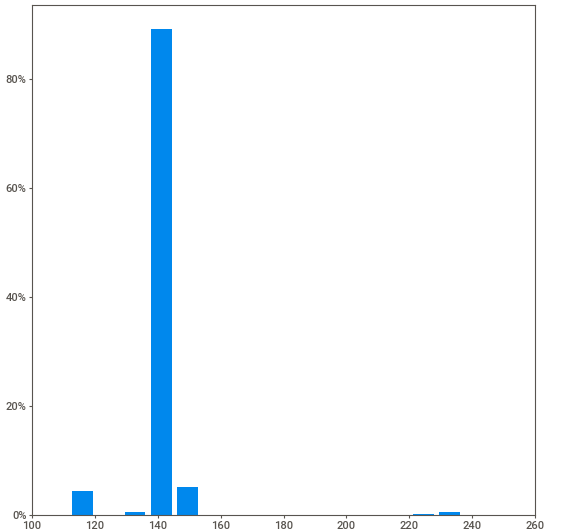
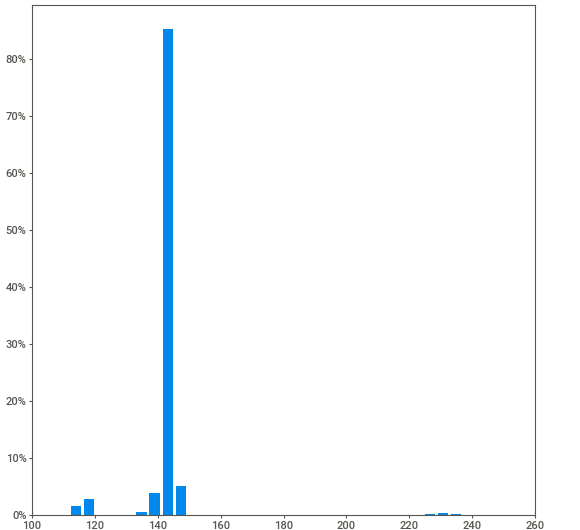
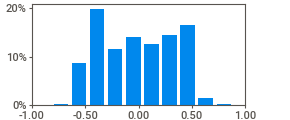
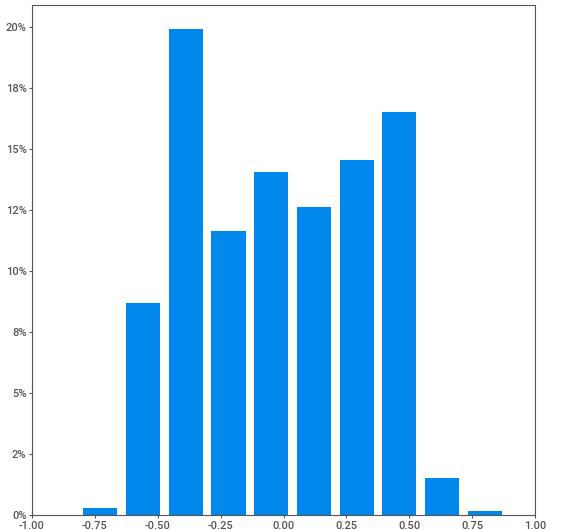
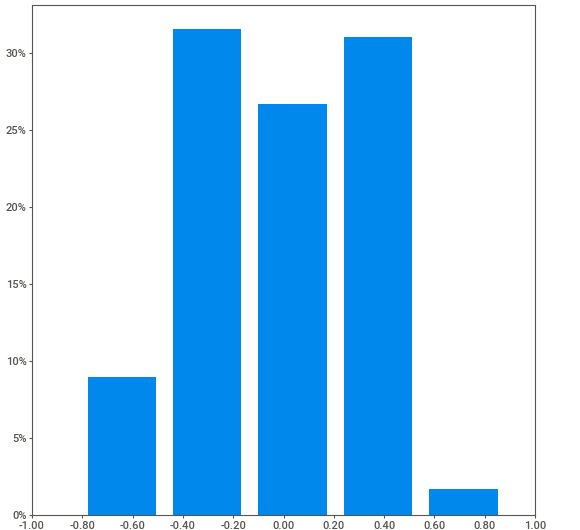
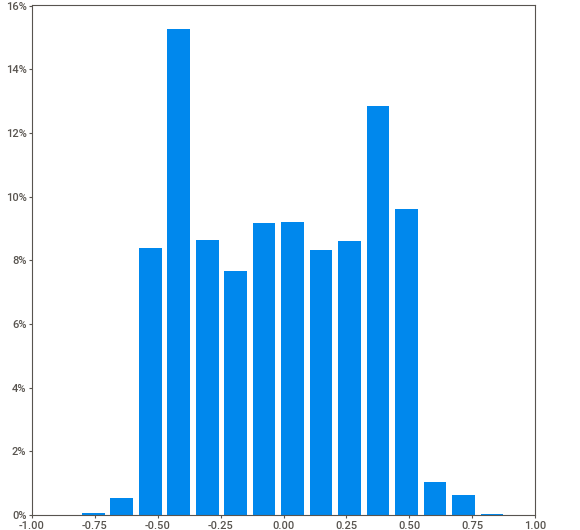
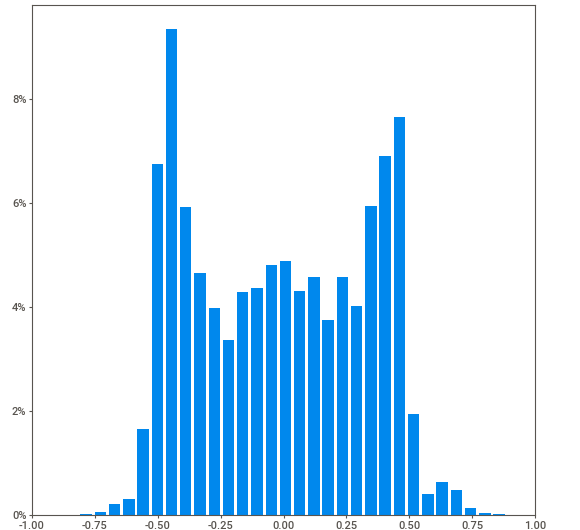
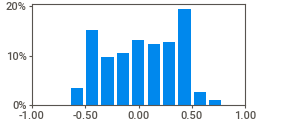
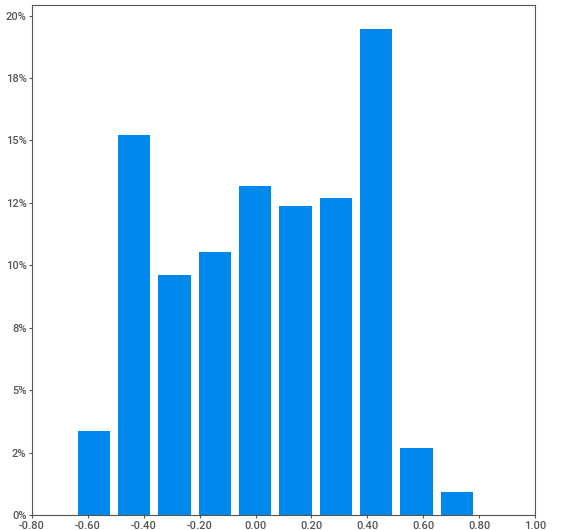
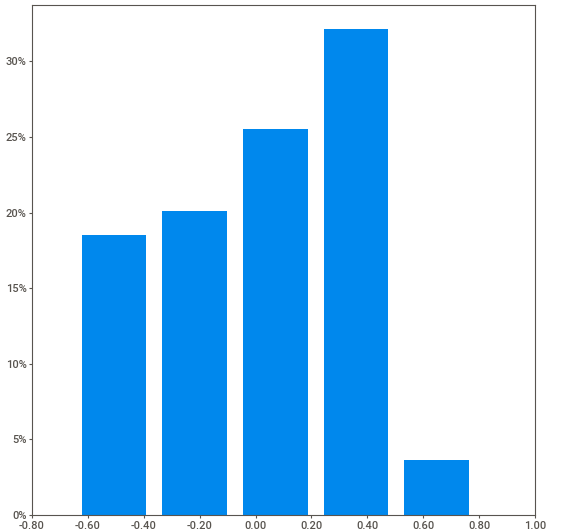
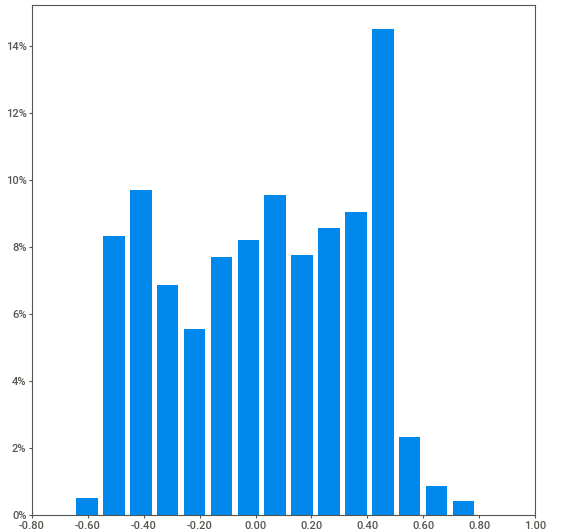
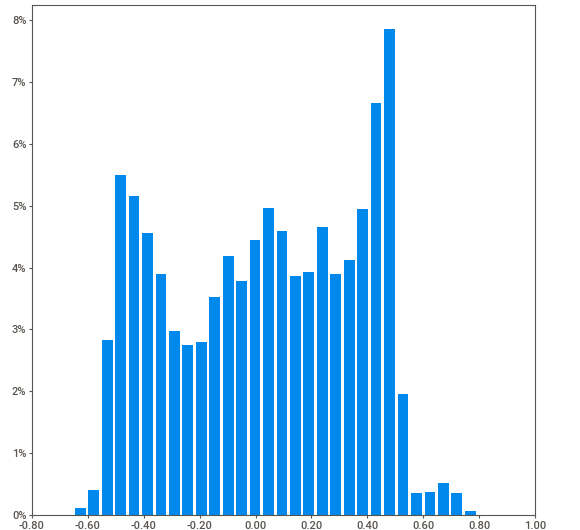
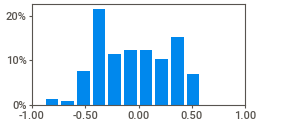
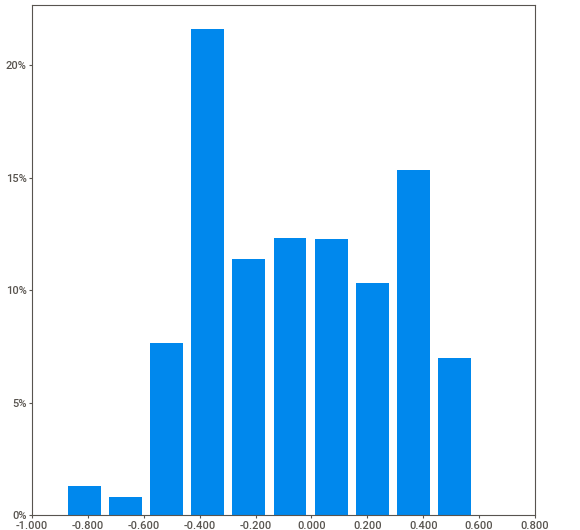
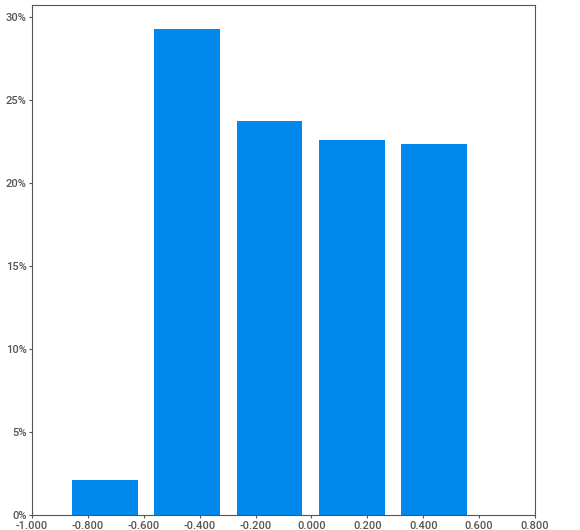
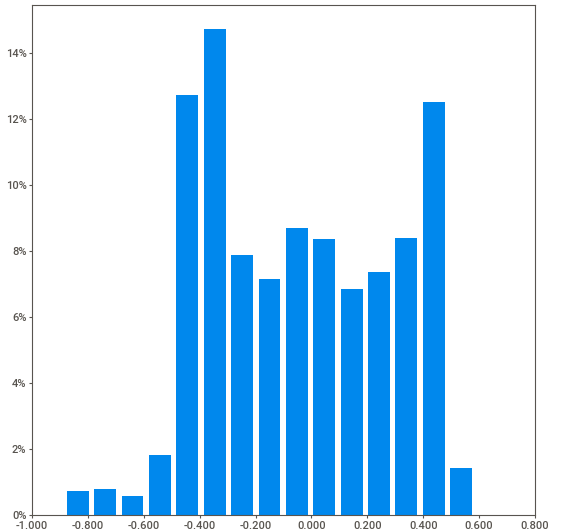
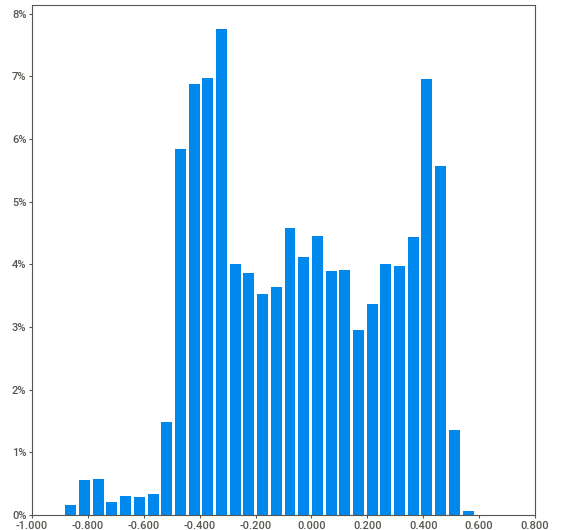
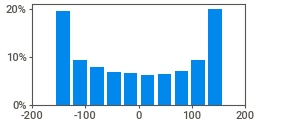
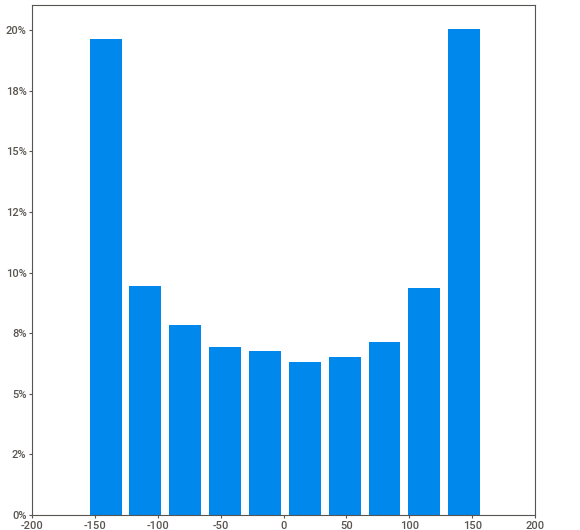
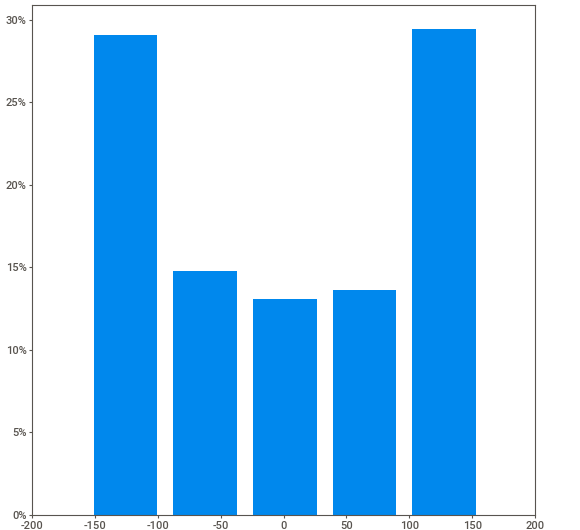
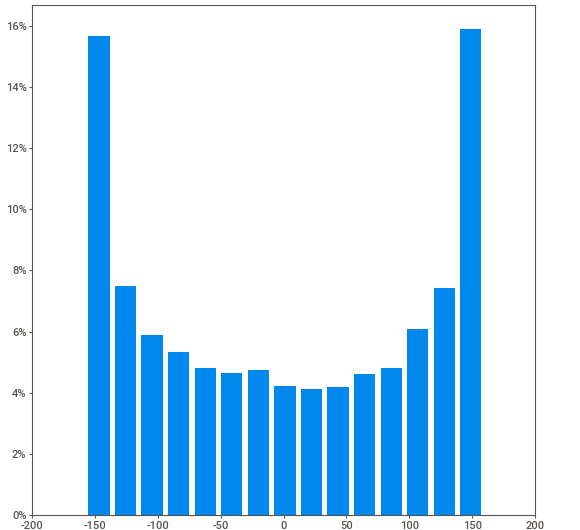
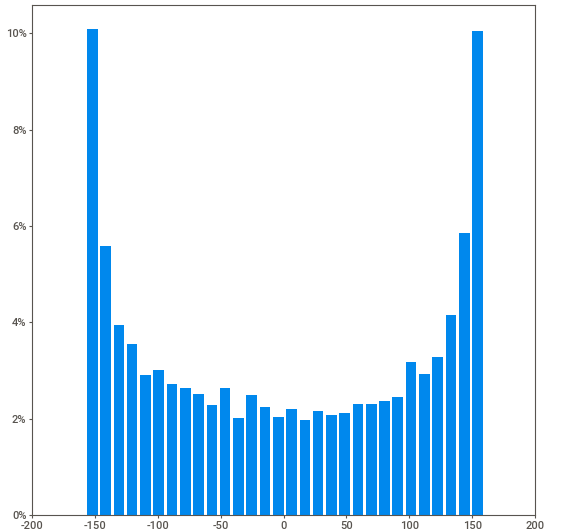
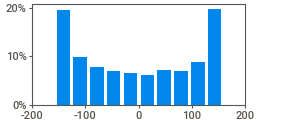
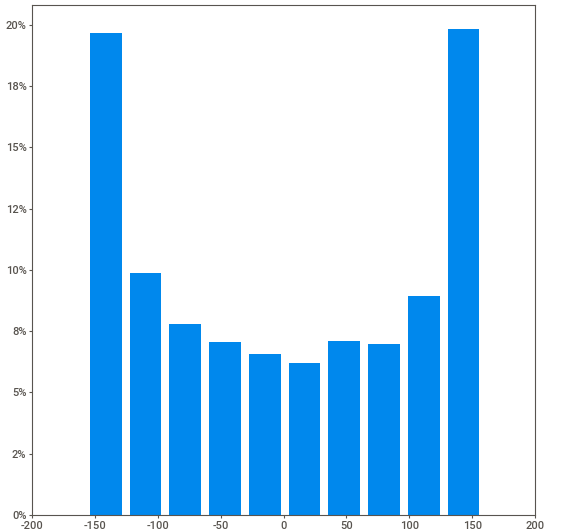
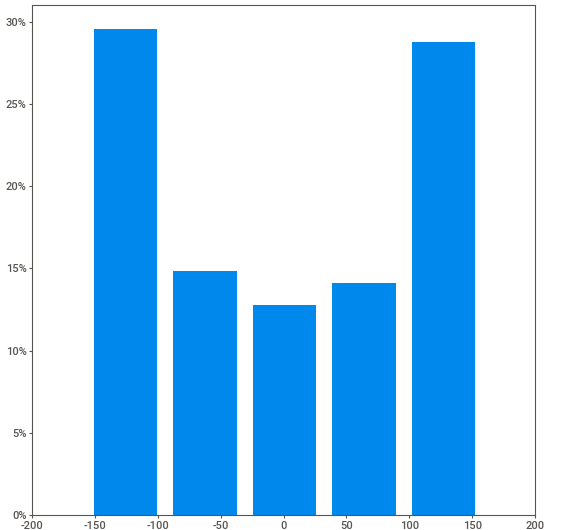
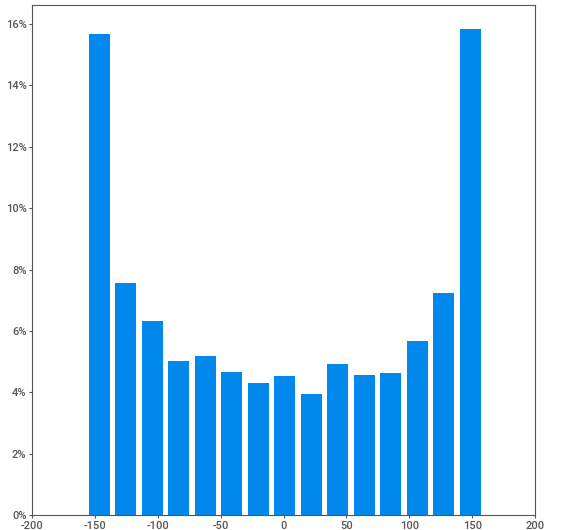
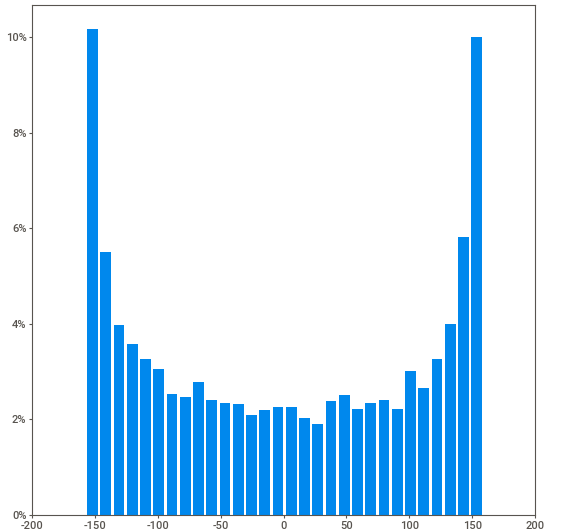
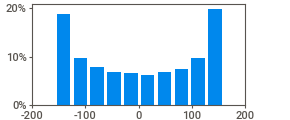
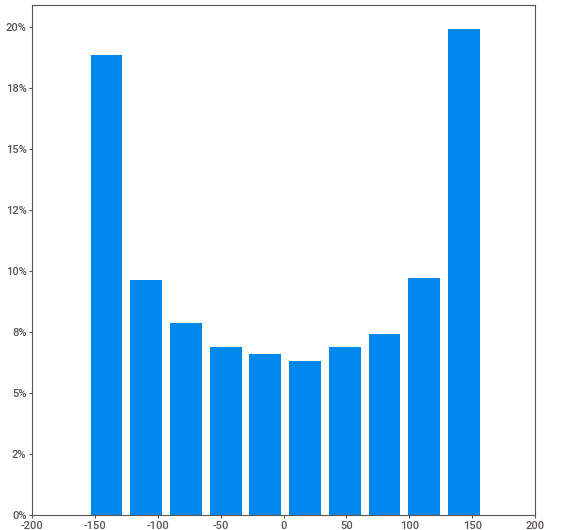
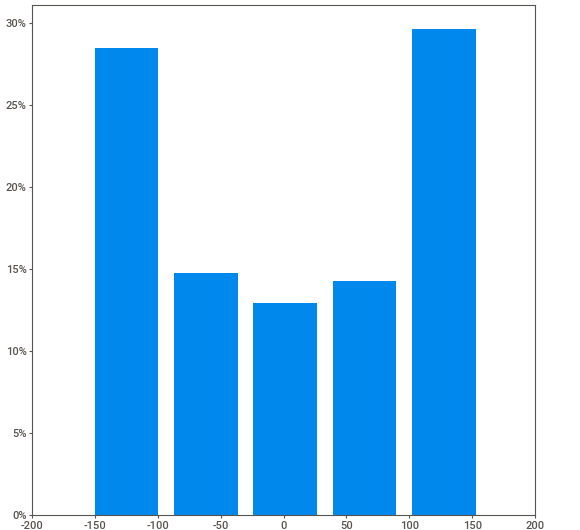
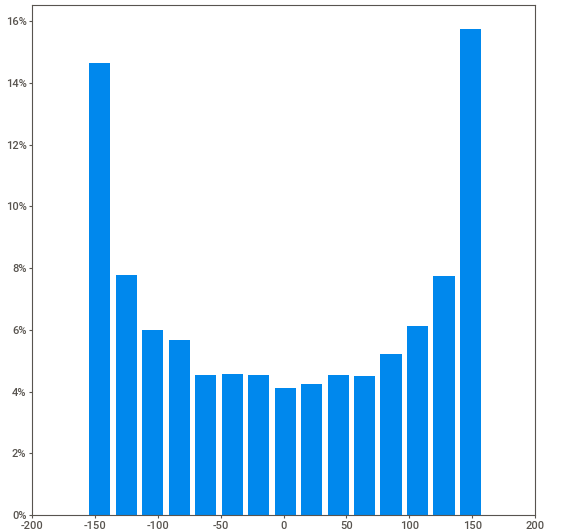
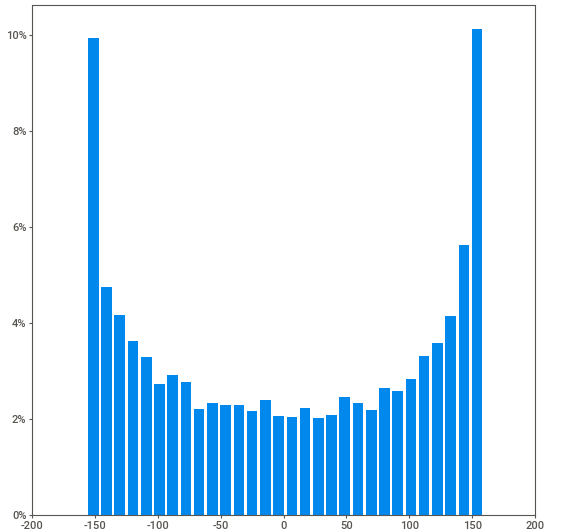
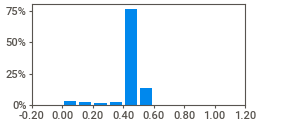
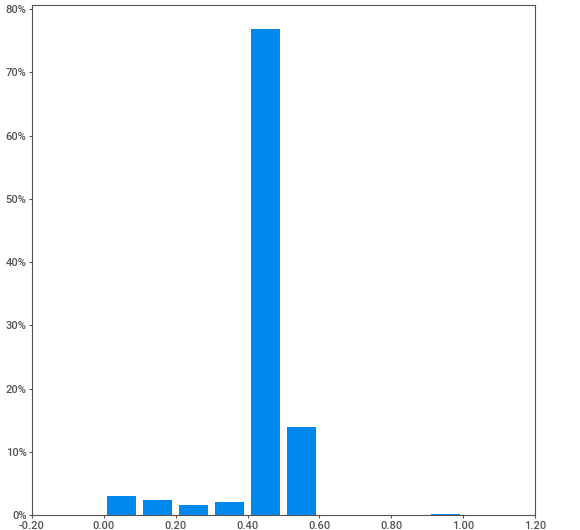
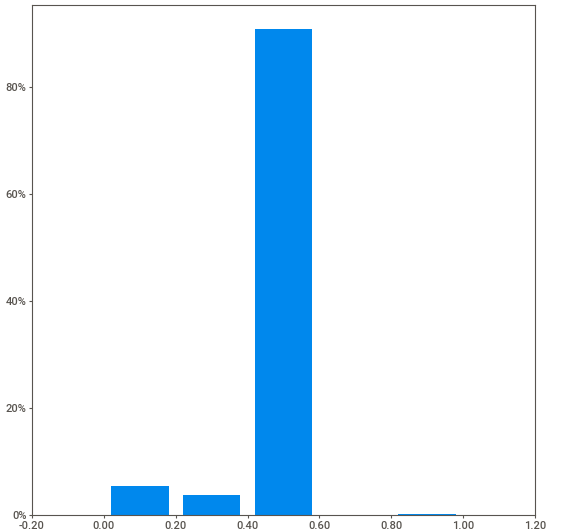
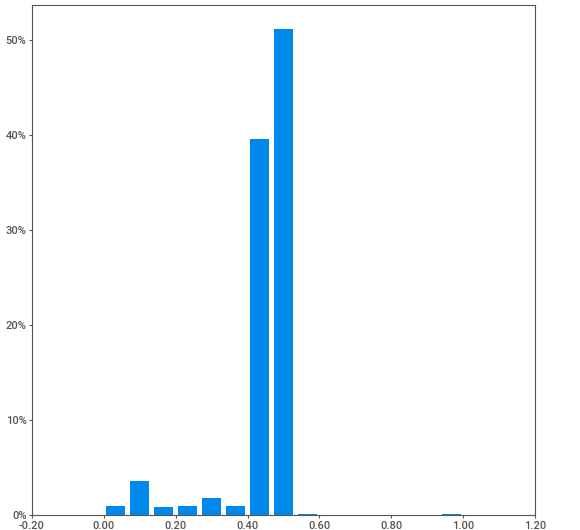
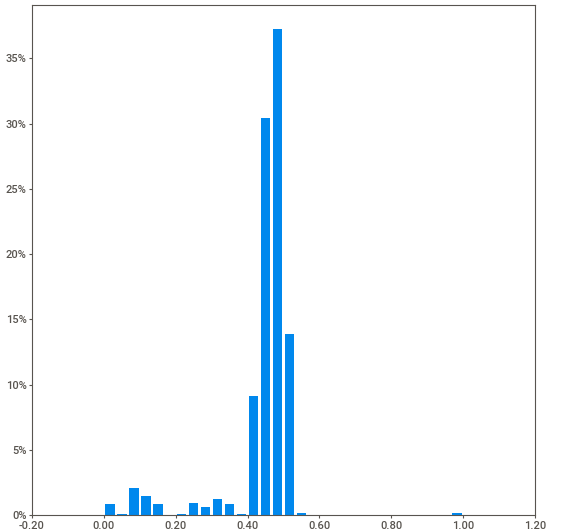
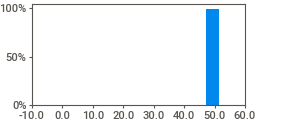
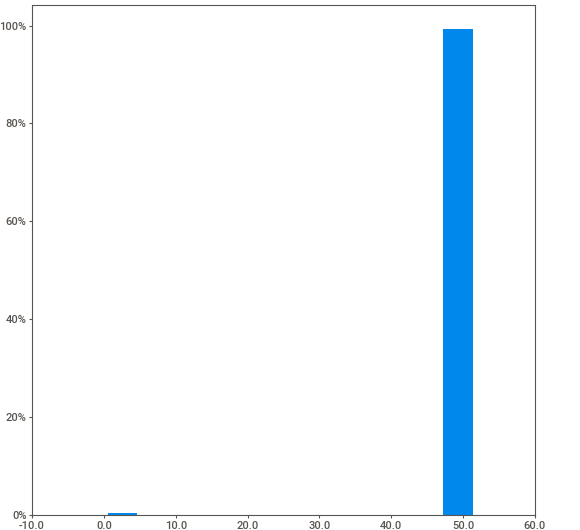
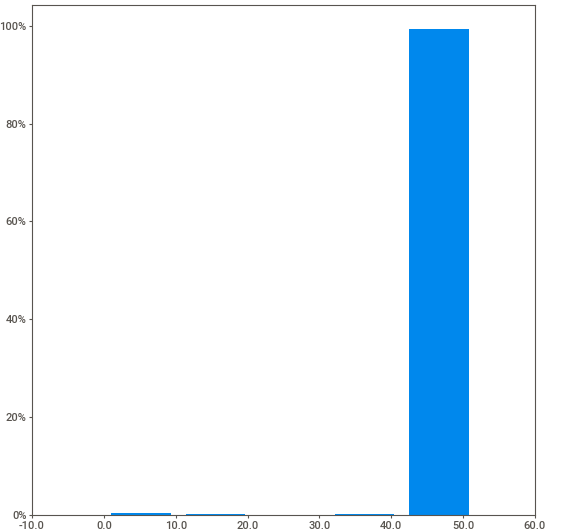
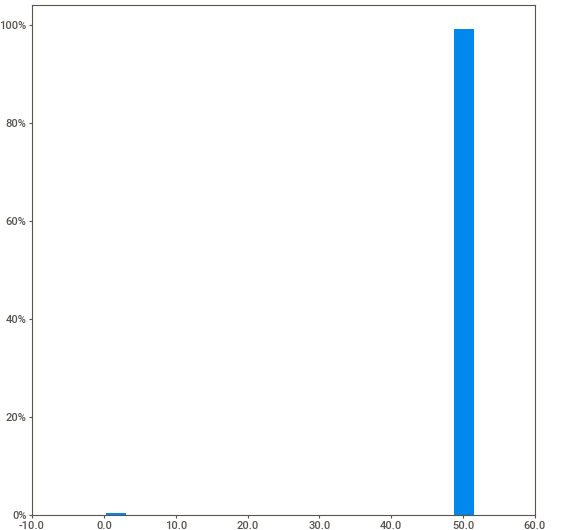
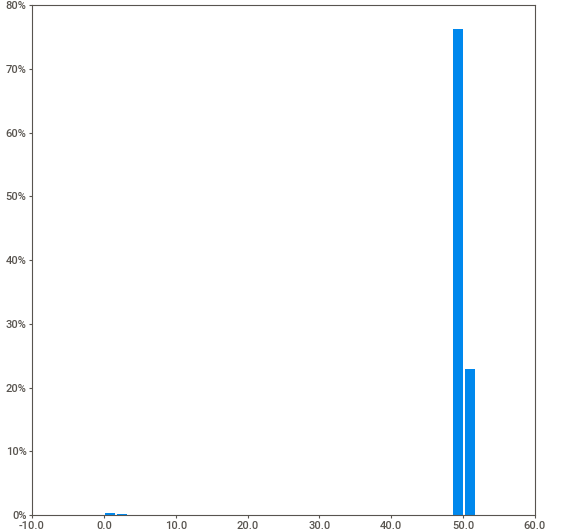
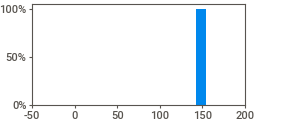
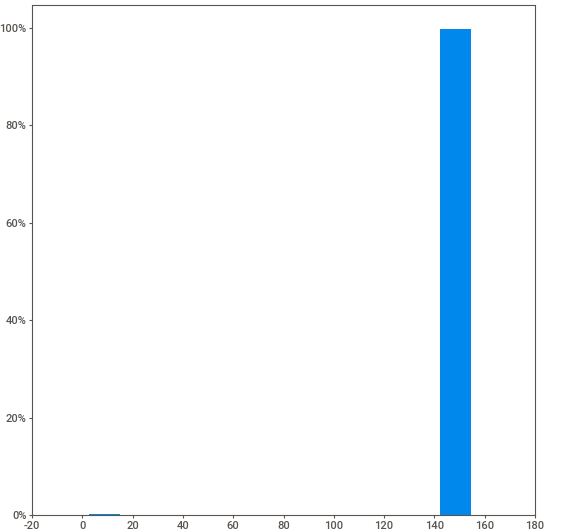
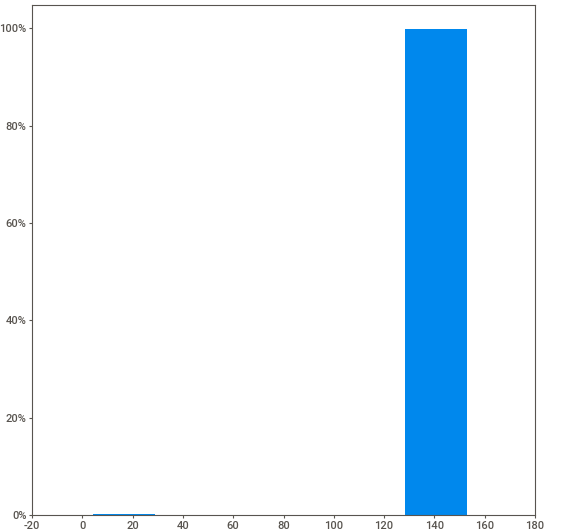
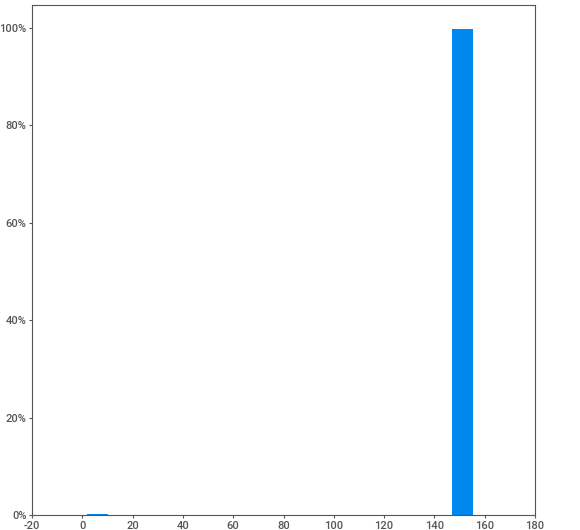
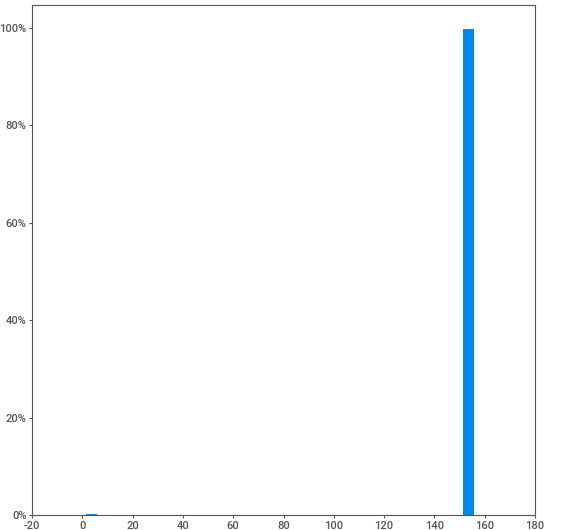
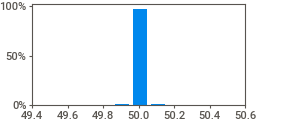
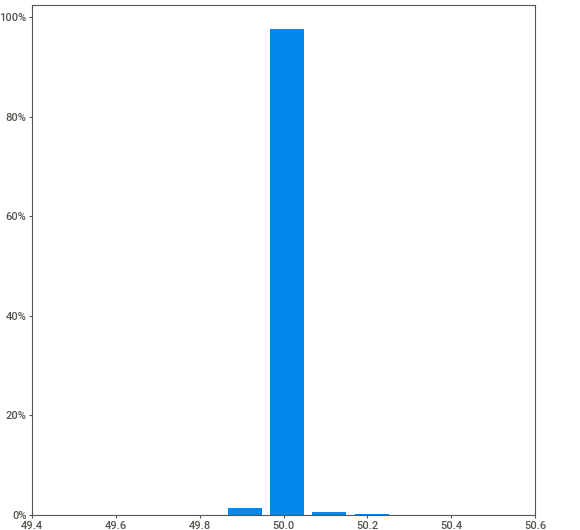
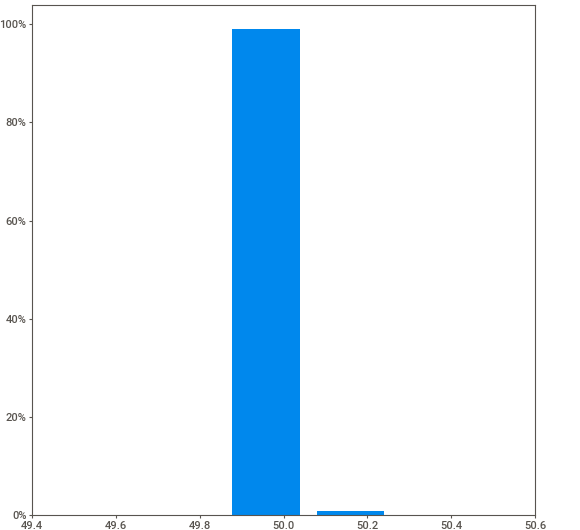
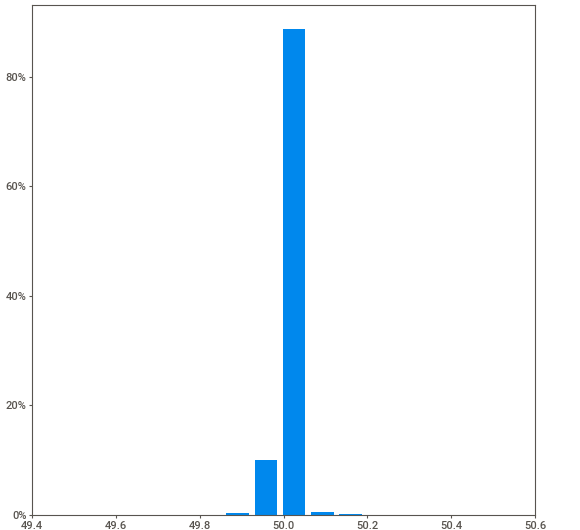
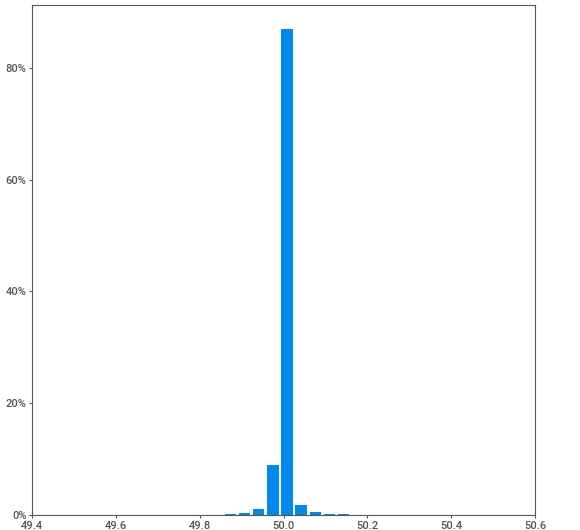
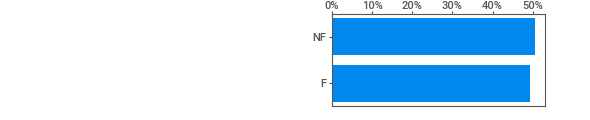
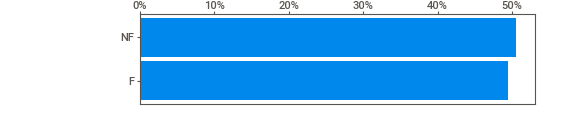
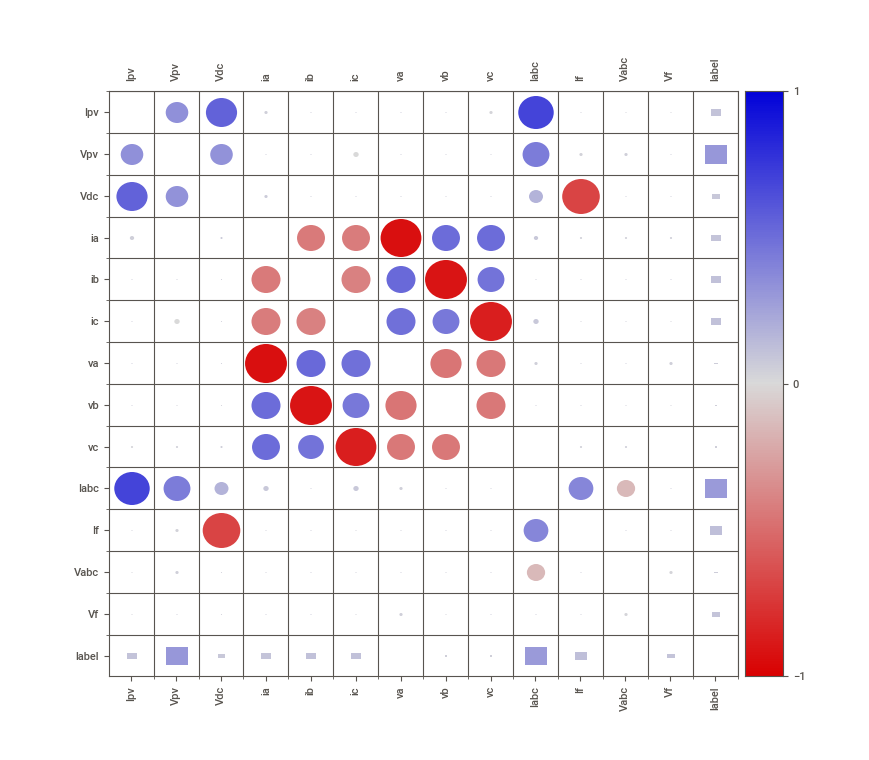
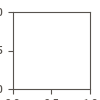

In [18]:
import sweetviz as sv

# Analyzing the dataset
report = sv.analyze(solar_data_final)

# Display the report
report.show_notebook()  # integrated report in notebook

# report.show_html('EDAreport.html') # html report generated in working directory


### PRE-PROCESSING

DATA IS CLEANED AND PREPROCESSING PIPELINES ARE CREATED

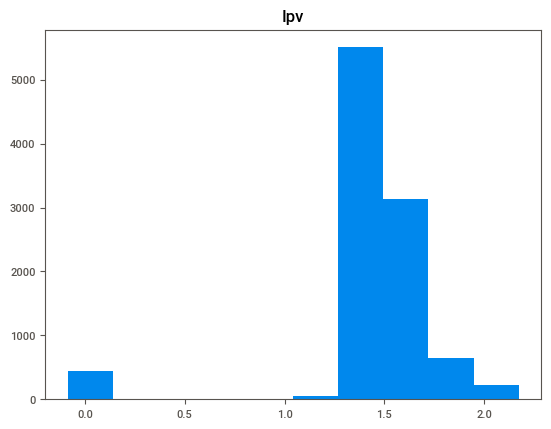

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


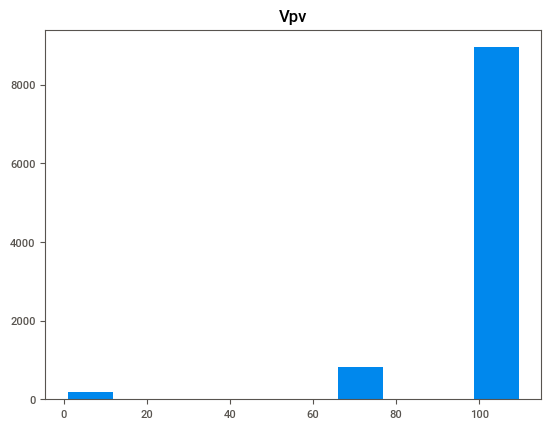

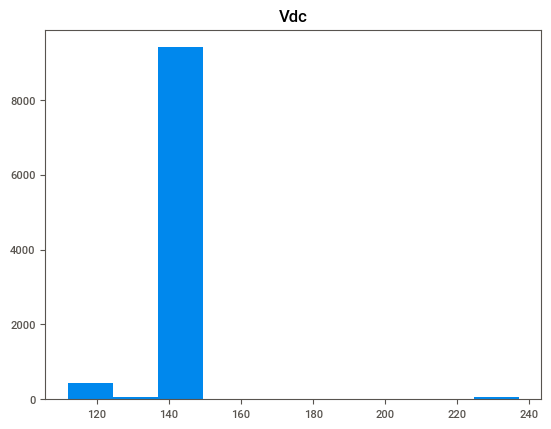

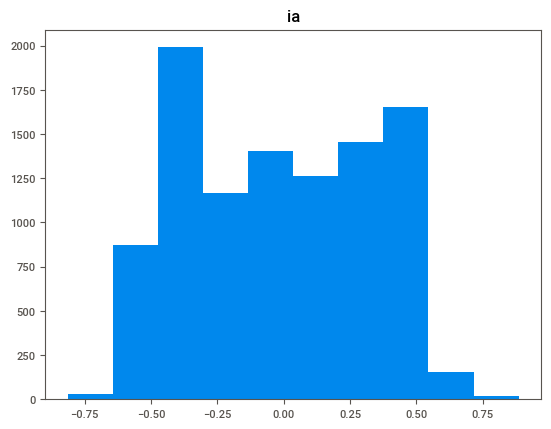

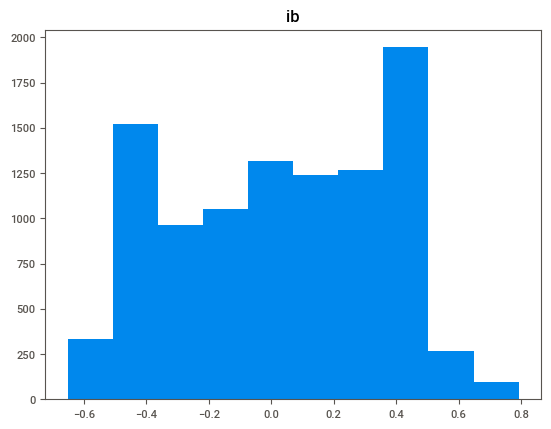

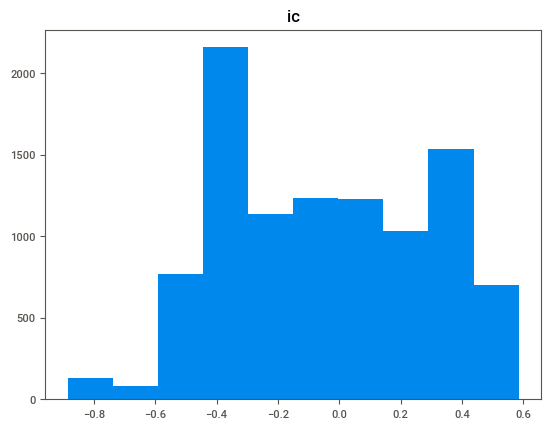

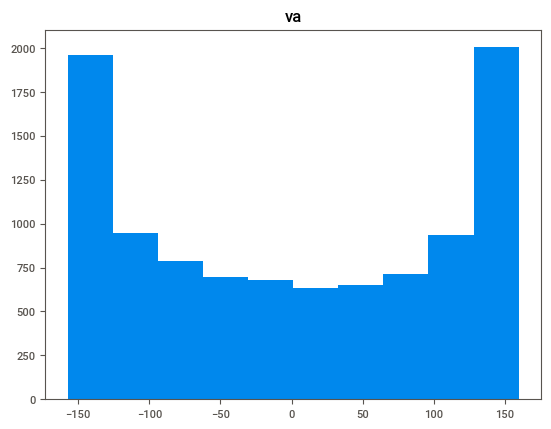

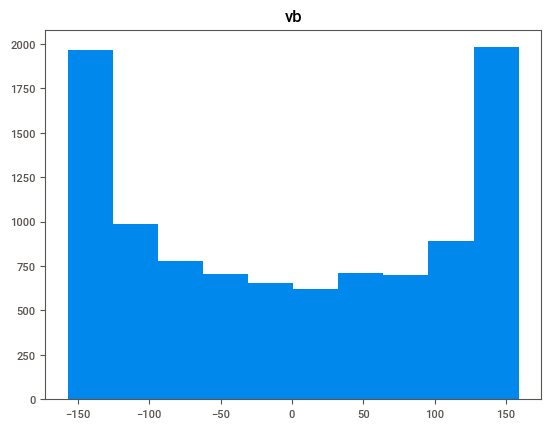

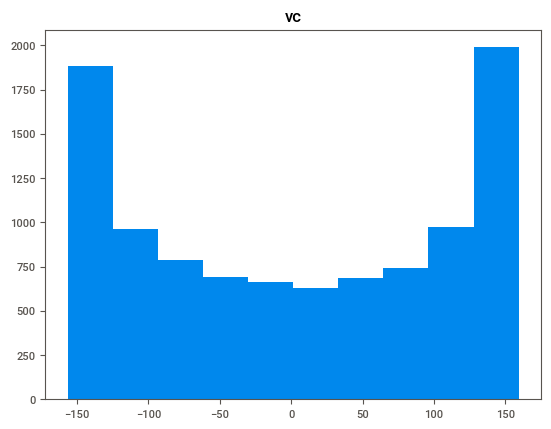

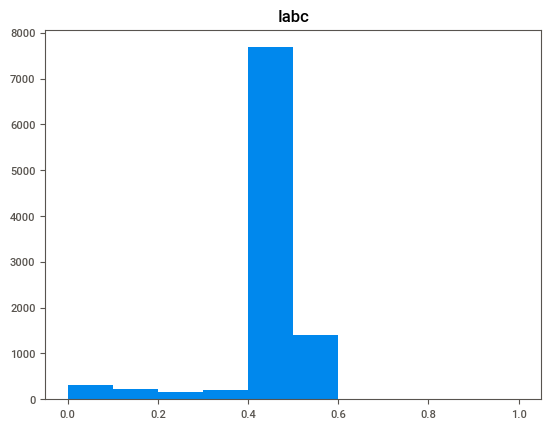

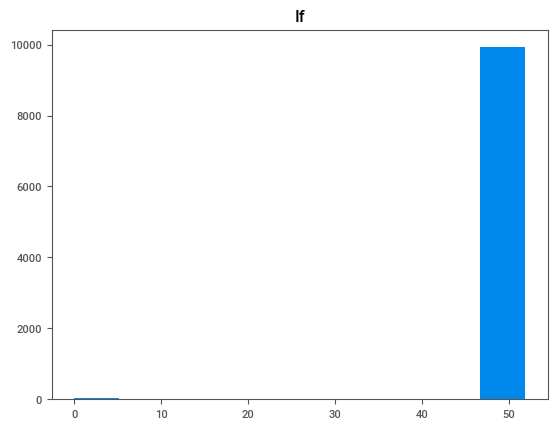

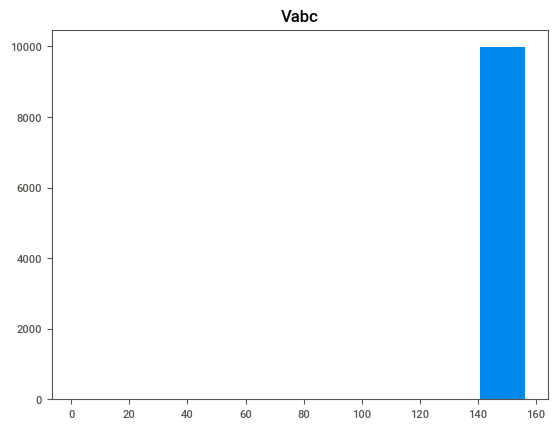

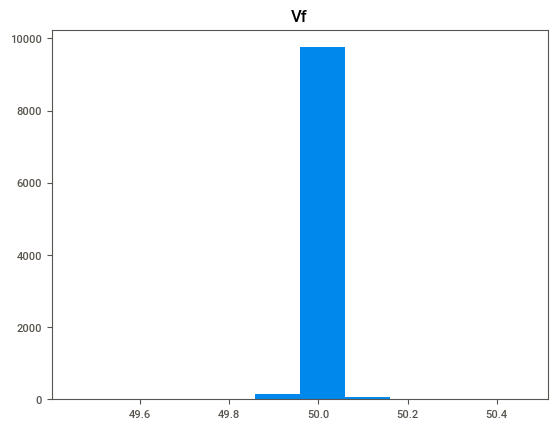

['Ipv', 'Vpv', 'Vdc', 'ia', 'ib', 'ic', 'va', 'vb', 'vc', 'Iabc', 'If', 'Vabc', 'Vf']


In [19]:
#Take out the features that require transformation
# initialize list to store non-normal features
non_normal_features = []

# iterate through features
for col in solar_data_final[Numerical_features]:
    # histogram plot
    plt.hist(solar_data_final[col])
    plt.title(col)
    plt.show()
    
    # Shapiro-Wilk test
    stat, p = shapiro(solar_data_final[col])
    if p < 0.05:
        non_normal_features.append(col)
        continue

print(non_normal_features)

## PREPROCESSING PIPELINES

APPLYING ROBUST SCALAR AS IT IS MORE SENSITIVE TO OUTLIERS.NOT APPLYING OUTLIER TREATMENT SEPARATELY.ONLY ONE NON NORMAL FEATURE SO APPLYING TRANSFORMATION ON ALL THE NUMERICAL FEATURES

In [20]:
# Creating pipeline for data preprocessing
# Defining the pipeline
pipeline = Pipeline([
    ("robust_scaler", RobustScaler()),
    ('yeo_johnson', PowerTransformer(method='yeo-johnson'))])


In [21]:
pipeline

Pipeline(steps=[('robust_scaler', RobustScaler()),
                ('yeo_johnson', PowerTransformer())])

In [22]:
# Fitting the pipeline to my df excluding label
pipeline.fit(solar_data_final[Numerical_features])

# Using the pipeline to transform the data
solar_data_final_transformed = pipeline.transform(solar_data_final[Numerical_features])

In [37]:
import pickle
pickle.dump(pipeline,open('pipeline.pkl','wb'))

In [23]:
solar_data_final_transformed

array([[ 1.5882273 , -1.59674595,  0.22239215, ...,  0.02328984,
        -0.5730597 , -0.10672227],
       [ 0.15220594, -0.00929856,  0.16027693, ...,  0.38774228,
         2.01673334,  0.47263706],
       [-0.60363453,  0.21948831,  0.12843179, ...,  0.02440647,
         0.24110172,  0.41921166],
       ...,
       [ 0.06720858,  0.16963638, -0.51165434, ..., -0.53090871,
        -0.721     ,  1.85091806],
       [-0.40023   ,  0.2071888 ,  0.1915679 , ...,  1.07634157,
        -0.99114012, -0.06300332],
       [-2.92315463, -3.35785907, -3.31639493, ..., -0.53745138,
        -0.77109834, -0.01790335]])

In [22]:
## FINAL TRANSFORMED DF EXCLUDING LABEL COLUMN
solar_data_final_df = pd.DataFrame(solar_data_final_transformed, columns=['Ipv','Vpv','Vdc','ia','ib','ic','va','vb','vc','Iabc','If','Vabc','Vf'])
solar_data_final_df

Ipv       Vpv       Vdc        ia        ib        ic        va  \
0      -0.607674  0.919787  0.014571 -0.573097 -0.350514  0.925946  0.749458   
1       1.744310 -2.327692 -4.397244  0.045215  0.013451  0.040391  1.014489   
2      -0.140447 -1.309431 -0.019782  0.826454 -0.665213  0.001873 -1.235700   
3      -0.621625  0.871629 -0.252898  0.461175 -0.287672 -0.601774 -1.396730   
4      -0.813789  0.938316  0.050037  1.191532  0.276172 -1.385646 -0.985694   
...          ...       ...       ...       ...       ...       ...       ...   
711818  0.793008 -0.534092  0.244637  1.166360 -1.157558 -0.062328 -1.218478   
711819  0.720401 -0.527893  0.244637  1.178946 -1.170202 -0.113692 -1.244037   
711820  0.749312 -0.525298  0.183535  1.191532 -1.132272 -0.165059 -1.261479   
711821  0.717999 -0.514318  0.244637  1.216703 -1.132272 -0.203586 -1.283088   
711822  0.871659 -0.525298  0.244637  1.229288 -1.081712 -0.216428 -1.295374   

              vb        vc      Iabc        If      Vabc        Vf  
0       0.631244 -1.414361 -0.242784 -0.085520 -0.976238  0.334726  
1      -1.362266  0.359706 -3.587673 -1.794693 -0.170166  0.004628  
2       1.219326  0.008225 -0.343171 -0.367203  0.250366  0.161275  
3       0.502256  0.920996 -0.983207 -0.744012  0.875635  0.974608  
4      -0.341809  1.373702 -0.332577 -0.417128  0.883848  0.103921  
...          ...       ...       ...       ...       ...       ...  
711818  1.240121  0.018032  0.745534 -0.553808  0.759985 -0.416607  
711819  1.217137  0.062675  0.745534 -0.553808  0.759985 -0.416607  
711820  1.191633  0.105962  0.745373 -0.559908  0.772598 -0.386715  
711821  1.174886  0.149651  0.745373 -0.559908  0.772598 -0.386715  
711822  1.137777  0.194510  0.745373 -0.559908  0.772598 -0.386715  

[711823 rows x 13 columns]

### SPLITTING THE TRAIN AND TEST

In [24]:
# input variables and target variable separation
X = solar_data_final_transformed
y = solar_data_final['label']

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# view the class counts in the training set
print("Class counts in training set:")
print(pd.Series(y_train).value_counts())

# view the class counts in the test set
print("Class counts in test set:")
print(pd.Series(y_test).value_counts())


Class counts in training set:
NF    4076
F     3924
Name: label, dtype: int64
Class counts in test set:
F     1021
NF     979
Name: label, dtype: int64


### MODEL TRAINING AND EVALUATION

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
algorithms = {'Logistic Regression': LogisticRegression(solver='sag', max_iter=1000),
              'KNN': KNeighborsClassifier(weights='distance'),
              'Decision Tree': DecisionTreeClassifier(),
              'Random Forest': RandomForestClassifier()}
# Iterate over the algorithms
for name, algorithm in algorithms.items():
    # Fit the algorithm to the training data
    algorithm.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = algorithm.predict(X_test)
    # Print the accuracy score on the test set
    print(f'{name} Test Accuracy: {accuracy_score(y_test, y_pred):.3f}')
    # Print the classification report on the test set
    print(f'{name} Test classification report:\n{classification_report(y_test, y_pred)}')


Logistic Regression Test Accuracy: 0.738
Logistic Regression Test classification report:
              precision    recall  f1-score   support

           F       0.79      0.67      0.72      1021
          NF       0.70      0.81      0.75       979

    accuracy                           0.74      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.74      0.74      0.74      2000

KNN Test Accuracy: 0.854
KNN Test classification report:
              precision    recall  f1-score   support

           F       0.92      0.78      0.85      1021
          NF       0.80      0.93      0.86       979

    accuracy                           0.85      2000
   macro avg       0.86      0.86      0.85      2000
weighted avg       0.86      0.85      0.85      2000

Decision Tree Test Accuracy: 0.910
Decision Tree Test classification report:
              precision    recall  f1-score   support

           F       0.92      0.90      0.91      1021
          NF  

-     Based on the results you've provided, it appears that the Random Forest method has the highest accuracy (94.5%) for detecting fault cases compared to Logistic Regression (73.8%), KNN (85.4%), Decision Tree (91.0%)

-   Based on these results, we can conclude that the Random Forest method is the most effective model for detecting fault cases in this particular dataset. The high accuracy and precision of the Random Forest method make it a reliable model for classifying fault and non-fault cases.

COMPARING MY TRAIN AND TEST ACCURACY FOR RANDOM FOREST FOR A BETTER UNDERSTANDING

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train the model on the training data
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict the labels on the training data
y_train_pred = model.predict(X_train)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)


Training Accuracy: 1.0


### THE MODEL IS RIGHTLY FITTING AS TRAIN TEST IS 99.9 AND TEST IS LITTLE LESS AS 98.7

### MODEL TUNING

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.metrics import make_scorer, recall_score

# Define the parameter grid for the random search
param_dist = {'n_estimators': sp_randint(50, 200),
              'max_depth': [3, None],
              'max_features': sp_randint(1, X.shape[1]),
              'min_samples_split': sp_randint(2, 11),
              'min_samples_leaf': sp_randint(1, 11),
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy']}

# Create a random forest classifier
rf = RandomForestClassifier()

# Define a custom scorer for recall
recall_scorer = make_scorer(recall_score, greater_is_better=True)

# Create the randomized search object
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, scoring=recall_scorer)

# Fit the randomized search object to the data
random_search.fit(X_train, y_train)

# Get the best set of hyperparameters
best_params = random_search.best_params_
print("Best Parameters: ",best_params)


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best Parameters:  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 9, 'min_samples_split': 7, 'n_estimators': 105}


### MODEL PREDICTION

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model with the best parameters
rf_model = RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=None, max_features=6, min_samples_leaf=9, min_samples_split=7, n_estimators=105)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Use the model to predict on the test data
y_pred = rf_model.predict(X_test)


In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           F       0.95      0.92      0.93      1021
          NF       0.92      0.95      0.93       979

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.94      0.93      0.93      2000



### RANDOM FOREST BASE MODEL IS GIVING BETTER ACCURACY , PRECISION AND RECALL THAN THE TUNED MODEL AND NOW LET'S SEE THE ROC-AUC CURVE

### MODEL EVALUATION

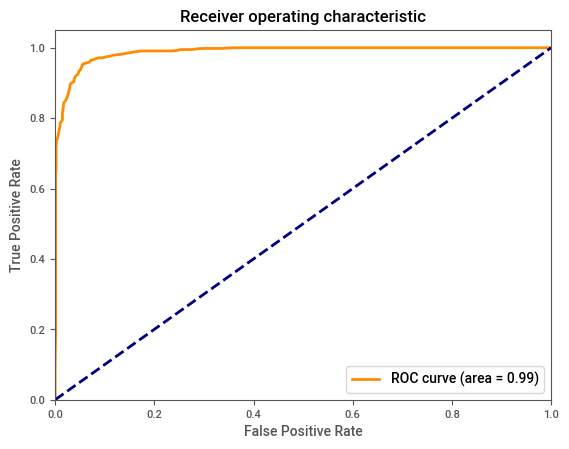

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_proba = algorithms['Random Forest'].predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label='NF')
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


### PREDICTION ON NEW DATA

In [32]:
solar_data_final_transformed[0].reshape(1,-1)

array([[ 1.5882273 , -1.59674595,  0.22239215, -0.53198589,  1.27932685,
        -0.6628961 ,  0.65352239, -1.40495321,  0.77314679,  0.02592142,
         0.02328984, -0.5730597 , -0.10672227]])

In [33]:
algorithms['Random Forest'].predict(solar_data_final_transformed[0].reshape(1,-1))

array(['F'], dtype=object)

### PICKLING THE MODEL FILE AND PREPROCESSING FILE

In [34]:
import pickle

# Assuming that 'pipeline' and 'model' are the objects to be saved
objects = {'pipeline': pipeline, 'model': model}

# Save the dictionary containing both objects to a single pickle file
with open('pipeline_and_model.pkl', 'wb') as f:
    pickle.dump(objects, f)


AttributeError: 'dict' object has no attribute 'predict'